# Real Estate

### Problem Statement

- A banking institution requires actionable insights from the perspective of Mortgage-Backed Securities, Geographic Business Investment and Real Estate Analysis. 
- The objective is to identify white spaces/potential business in the mortgage loan. The mortgage bank would like to identify potential monthly mortgage expenses for each of region based on factors which are primarily monthly family income in a region and rented value of the real estate. Some of the regions are growing rapidly and Competitor banks are selling mortgage loans to subprime customers at a lower interest rate. The bank is strategizing for better market penetration and targeting new customers. 
- A statistical model needs to be created to predict the potential demand in dollars amount of loan for each of the region in the USA. Also, there is a need to create a dashboard which would refresh periodically post data retrieval from the agencies. This would help to monitor the key metrics and trends.
- The dashboard must demonstrate relationships and trends for the key metrics as follows:  number of loans, average rental income, monthly mortgage and owner’s cost, family income vs mortgage cost comparison across different regions. The metrics are described not to limit the dashboard to these few only.


#### Project Task: Week 1
##### Data Import and Preparation:

  1. Import data.
  2. Figure out the primary key and look for the requirement of indexing.
  3. Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.
  
##### Exploratory Data Analysis (EDA):

  4. Perform debt analysis. You may take the following steps:

  a) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

  b) Use the following bad debt equation: Bad Debt = P (Second Mortgage ∩ Home Equity Loan) Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage 
  
  c) Create pie charts to show overall debt and bad debt

  d) Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

  e) Create a collated income distribution chart for family income, house hold income, and remaining income

## Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID        state state_ab  \
0  267822      NaN       140        53       36     New York       NY   
1  246444      NaN       140       141       18      Indiana       IN   
2  245683      NaN       140        63       18      Indiana       IN   
3  279653      NaN       140       127       72  Puerto Rico       PR   
4  247218      NaN       140       161       20       Kansas       KS   

         city           place   type primary  zip_code  area_code        lat  \
0    Hamilton        Hamilton   City   tract     13346        315  42.840812   
1  South Bend        Roseland   City   tract     46616        574  41.701441   
2    Danville        Danville   City   tract     46122        317  39.792202   
3    San Juan        Guaynabo  Urban   tract       927        787  18.396103   
4   Manhattan  Manhattan City   City   tract     66502        785  39.195573   

         lng        ALand   AWater   pop  male_pop  female_pop  rent_mean  \
0 -75.501524  202183361.0  1699120  5230      2612        2618  769.38638   
1 -86.266614    1560828.0   100363  2633      1349        1284  804.87924   
2 -86.515246   69561595.0   284193  6881      3643        3238  742.77365   
3 -66.104169    1105793.0        0  2700      1141        1559  803.42018   
4 -96.569366    2554403.0        0  5637      2586        3051  938.56493   

   rent_median  rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  \
0        784.0   232.63967           272.34441         362.0     0.86761   
1        848.0   253.46747           312.58622         513.0     0.97410   
2        703.0   323.39011           291.85520         378.0     0.95238   
3        782.0   297.39258           259.30316         368.0     0.94693   
4        881.0   392.44096          1005.42886        1704.0     0.99286   

   rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  \
0     0.79155     0.59155     0.45634     0.42817     0.18592     0.15493   
1     0.93227     0.69920     0.69920     0.55179     0.41235     0.39044   
2     0.88624     0.79630     0.66667     0.39153     0.39153     0.28307   
3     0.87151     0.69832     0.61732     0.51397     0.46927     0.35754   
4     0.98247     0.91688     0.84740     0.78247     0.60974     0.55455   

   rent_gt_50  universe_samples  used_samples      hi_mean  hi_median  \
0     0.12958               387           355  63125.28406    48120.0   
1     0.27888               542           502  41931.92593    35186.0   
2     0.15873               459           378  84942.68317    74964.0   
3     0.32961               438           358  48733.67116    37845.0   
4     0.44416              1725          1540  31834.15466    22497.0   

      hi_stdev  hi_sample_weight  hi_samples  family_mean  family_median  \
0  49042.01206        1290.96240      2024.0  67994.14790        53245.0   
1  31639.50203         838.74664      1127.0  50670.10337        43023.0   
2  56811.62186        1155.20980      2488.0  95262.51431        85395.0   
3  45100.54010         928.32193      1267.0  56401.68133        44399.0   
4  34046.50907        1548.67477      1983.0  54053.42396        50272.0   

   family_stdev  family_sample_weight  family_samples  hc_mortgage_mean  \
0   47667.30119             884.33516          1491.0        1414.80295   
1   34715.57548             375.28798           554.0         864.41390   
2   49292.67664             709.74925          1889.0        1506.06758   
3   41082.90515             490.18479           729.0        1175.28642   
4   39609.12605             244.08903           395.0        1192.58759   

   hc_mortgage_median  hc_mortgage_stdev  hc_mortgage_sample_weight  \
0              1223.0          641.22898                  377.83135   
1               784.0          482.27020                  316.88320   
2              1361.0          731.89394                  699.41354   
3              1101.0          428.98751                  261.28471   
4

In [3]:
data.shape

(27321, 80)

In [4]:
data.describe()

UID  BLOCKID  SUMLEVEL      COUNTYID       STATEID  \
count   27321.000000      0.0   27321.0  27321.000000  27321.000000   
mean   257331.996303      NaN     140.0     85.646426     28.271806   
std     21343.859725      NaN       0.0     98.333097     16.392846   
min    220342.000000      NaN     140.0      1.000000      1.000000   
25%    238816.000000      NaN     140.0     29.000000     13.000000   
50%    257220.000000      NaN     140.0     63.000000     28.000000   
75%    275818.000000      NaN     140.0    109.000000     42.000000   
max    294334.000000      NaN     140.0    840.000000     72.000000   

           zip_code     area_code           lat           lng         ALand  \
count  27321.000000  27321.000000  27321.000000  27321.000000  2.732100e+04   
mean   50081.999524    596.507668     37.508813    -91.288394  1.295106e+08   
std    29558.115660    232.497482      5.588268     16.343816  1.275531e+09   
min      602.000000    201.000000     17.929085   -165.453872  4.113400e+04   
25%    26554.000000    405.000000     33.899064    -97.816067  1.799408e+06   
50%    47715.000000    614.000000     38.755183    -86.554374  4.866940e+06   
75%    77093.000000    801.000000     41.380606    -79.782503  3.359820e+07   
max    99925.000000    989.000000     67.074017    -65.379332  1.039510e+11   

             AWater           pop      male_pop    female_pop     rent_mean  \
count  2.732100e+04  27321.000000  27321.000000  27321.000000  27007.000000   
mean   6.521754e+06   4316.032685   2123.924820   2192.107866   1055.129032   
std    2.186781e+08   2169.226173   1114.948893   1101.895160    437.430562   
min    0.000000e+00      0.000000      0.000000      0.000000    117.150000   
25%    0.000000e+00   2885.000000   1403.000000   1454.000000    743.153540   
50%    2.756300e+04   4042.000000   1978.000000   2056.000000    953.193930   
75%    5.239880e+05   5430.000000   2668.000000   2764.000000   1259.900165   
max    2.453228e+10  53812.000000  27962.000000  27250.000000   3962.342290   

        rent_median    rent_stdev  rent_sample_weight  rent_samples  \
count  27007.000000  27007.000000        27007.000000  27007.000000   
mean    1007.672789    394.256202          295.979447    548.005702   
std      443.797814    187.190303          272.203470    461.547524   
min      104.000000     18.257420            0.343000      4.000000   
25%      702.000000    263.662575          101.922785    221.000000   
50%      897.000000    346.397060          219.210100    424.000000   
75%     1198.000000    475.601650          408.709870    742.000000   
max     3972.000000   1556.383030         3060.247900   6281.000000   

         rent_gt_10    rent_gt_15    rent_gt_20    rent_gt_25    rent_gt_30  \
count  27007.000000  27007.000000  27007.000000  27007.000000  27007.000000   
mean       0.957824      0.867134      0.739429      0.612959      0.499994   
std        0.063186      0.109655      0.143799      0.160305      0.164006   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.940625      0.819330      0.662085      0.517115      0.396230   
50%        0.977070      0.888160      0.758170      0.625000      0.503790   
75%        1.000000      0.940680      0.837300      0.722290      0.608515   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         rent_gt_35    rent_gt_40    rent_gt_50  universe_samples  \
count  27007.000000  27007.000000  27007.000000      27321.000000   
mean       0.411007      0.345424      0.254469        574.269390   
std        0.160201      0.153217      0.137742        466.009996   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.307095      0.243325      0.160775        250.000000   
50%        0.408600      0.338620      0.242950        454.000000   
75%        0.515145      0.440915      0.335690        771.000000   
max        1.000000      1.000000      1.000000  

#### From statistics method, we can see column 'BLOCKID' has missing values in all rows, column 'SUMLEVEL' has only one value with no variance. So we can remove these two columns safely without losing any information.


In [5]:
data.drop(['BLOCKID', 'SUMLEVEL'], axis = 1, inplace = True)

In [6]:
#check duplicates
data.duplicated().sum()

160

In [7]:
#drop duplicates
data.drop_duplicates(inplace = True)

#### Features 'UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng' should be categorical variables, we can convert these to category data types.

In [8]:
category_col = ['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng']
category_col

['UID',
 'COUNTYID',
 'STATEID',
 'state',
 'state_ab',
 'city',
 'place',
 'type',
 'primary',
 'zip_code',
 'area_code',
 'lat',
 'lng']

In [9]:
for col in category_col:
    data[col] = data[col].astype('category', copy = False)

In [10]:
data.dtypes

UID                            category
COUNTYID                       category
STATEID                        category
state                          category
state_ab                       category
city                           category
place                          category
type                           category
primary                        category
zip_code                       category
area_code                      category
lat                            category
lng                            category
ALand                           float64
AWater                            int64
pop                               int64
male_pop                          int64
female_pop                        int64
rent_mean                       float64
rent_median                     float64
rent_stdev                      float64
rent_sample_weight              float64
rent_samples                    float64
rent_gt_10                      float64
rent_gt_15                      float64


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27161 entries, 0 to 27320
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   UID                          27161 non-null  category
 1   COUNTYID                     27161 non-null  category
 2   STATEID                      27161 non-null  category
 3   state                        27161 non-null  category
 4   state_ab                     27161 non-null  category
 5   city                         27161 non-null  category
 6   place                        27161 non-null  category
 7   type                         27161 non-null  category
 8   primary                      27161 non-null  category
 9   zip_code                     27161 non-null  category
 10  area_code                    27161 non-null  category
 11  lat                          27161 non-null  category
 12  lng                          27161 non-null  category
 13  A

In [12]:
for col in category_col:
    print(col)
    print(data[col].nunique())
    print(data[col].unique())
    print()

UID
27161
[267822, 246444, 245683, 279653, 247218, ..., 279212, 277856, 233000, 287425, 265371]
Length: 27161
Categories (27161, int64): [220342, 220345, 220347, 220348, ..., 294326, 294327, 294331, 294334]

COUNTYID
296
[53, 141, 63, 127, 161, ..., 660, 331, 377, 164, 180]
Length: 296
Categories (296, int64): [1, 3, 5, 6, ..., 800, 810, 820, 840]

STATEID
52
[36, 18, 72, 20, 1, ..., 31, 38, 35, 23, 10]
Length: 52
Categories (52, int64): [1, 2, 4, 5, ..., 54, 55, 56, 72]

state
52
['New York', 'Indiana', 'Puerto Rico', 'Kansas', 'Alabama', ..., 'Nebraska', 'North Dakota', 'New Mexico', 'Maine', 'Delaware']
Length: 52
Categories (52, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

state_ab
52
['NY', 'IN', 'PR', 'KS', 'AL', ..., 'NE', 'ND', 'NM', 'ME', 'DE']
Length: 52
Categories (52, object): ['AK', 'AL', 'AR', 'AZ', ..., 'WA', 'WI', 'WV', 'WY']

city
6916
['Hamilton', 'South Bend', 'Danville', 'San Juan', 'Manhattan', .

C:\Users\bnmwe\anaconda3\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


In [13]:
#UID is unique userID value in the dataset. So an index can be created from the UID feature if you think it is necessary. 
#data.set_index(keys = ['UID'], drop=True, append=False, inplace=True)

#### Column 'primary' has only one value, we remove it.

In [14]:
data.drop('primary', axis = 1, inplace = True)

In [15]:
#check missing values
data.isna().sum()

UID                              0
COUNTYID                         0
STATEID                          0
state                            0
state_ab                         0
city                             0
place                            0
type                             0
zip_code                         0
area_code                        0
lat                              0
lng                              0
ALand                            0
AWater                           0
pop                              0
male_pop                         0
female_pop                       0
rent_mean                      242
rent_median                    242
rent_stdev                     242
rent_sample_weight             242
rent_samples                   242
rent_gt_10                     242
rent_gt_15                     242
rent_gt_20                     242
rent_gt_25                     242
rent_gt_30                     242
rent_gt_35                     242
rent_gt_40          

In [16]:
#calculate the percentage of missing values in each column
round(data.isnull().sum()/len(data)*100, 2)

UID                            0.00
COUNTYID                       0.00
STATEID                        0.00
state                          0.00
state_ab                       0.00
city                           0.00
place                          0.00
type                           0.00
zip_code                       0.00
area_code                      0.00
lat                            0.00
lng                            0.00
ALand                          0.00
AWater                         0.00
pop                            0.00
male_pop                       0.00
female_pop                     0.00
rent_mean                      0.89
rent_median                    0.89
rent_stdev                     0.89
rent_sample_weight             0.89
rent_samples                   0.89
rent_gt_10                     0.89
rent_gt_15                     0.89
rent_gt_20                     0.89
rent_gt_25                     0.89
rent_gt_30                     0.89
rent_gt_35                  

#### We can see the percentage of missing values from 0 to 1.76% which is very small part compared to all data points, We can remove missing value without losing much information. But here I will treat missing values by using mean or median imputation.

In [17]:
missing_values_col = [col for col in data.columns if data[col].isna().any()]
missing_values_col

['rent_mean',
 'rent_median',
 'rent_stdev',
 'rent_sample_weight',
 'rent_samples',
 'rent_gt_10',
 'rent_gt_15',
 'rent_gt_20',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'hi_mean',
 'hi_median',
 'hi_stdev',
 'hi_sample_weight',
 'hi_samples',
 'family_mean',
 'family_median',
 'family_stdev',
 'family_sample_weight',
 'family_samples',
 'hc_mortgage_mean',
 'hc_mortgage_median',
 'hc_mortgage_stdev',
 'hc_mortgage_sample_weight',
 'hc_mortgage_samples',
 'hc_mean',
 'hc_median',
 'hc_stdev',
 'hc_samples',
 'hc_sample_weight',
 'home_equity_second_mortgage',
 'second_mortgage',
 'home_equity',
 'debt',
 'second_mortgage_cdf',
 'home_equity_cdf',
 'debt_cdf',
 'hs_degree',
 'hs_degree_male',
 'hs_degree_female',
 'male_age_mean',
 'male_age_median',
 'male_age_stdev',
 'male_age_sample_weight',
 'male_age_samples',
 'female_age_mean',
 'female_age_median',
 'female_age_stdev',
 'female_age_sample_weight',
 'female_age_samples',
 'pct_own',
 'married'

In [18]:
#imputation
from sklearn.impute import SimpleImputer

In [19]:
impute_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [20]:
for col in missing_values_col:
    data[[col]] = impute_mean.fit_transform(data[[col]])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27161 entries, 0 to 27320
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   UID                          27161 non-null  category
 1   COUNTYID                     27161 non-null  category
 2   STATEID                      27161 non-null  category
 3   state                        27161 non-null  category
 4   state_ab                     27161 non-null  category
 5   city                         27161 non-null  category
 6   place                        27161 non-null  category
 7   type                         27161 non-null  category
 8   zip_code                     27161 non-null  category
 9   area_code                    27161 non-null  category
 10  lat                          27161 non-null  category
 11  lng                          27161 non-null  category
 12  ALand                        27161 non-null  float64 
 13  A

In [22]:
#created new dataframe with a copy of the calling object’s data and indices. Modifications to the data or indices of the copy will not be reflected in the original object
#I will use original one for exploratory data analysis.
df = data.copy(deep = True) #by default, deep equals true
df_final = data.copy(deep = True)
df.to_excel('real_estate.xlsx', sheet_name = 'real estate', index = False)

## Exploratory Data Analysis

In [23]:
#filter data where the percentage of households with a second mortage is the top 2500 and pct is greater than 10%
top_2500 = data[data['pct_own'] > 0.1].nlargest(2500, 'second_mortgage')
top_2500.head()

UID COUNTYID STATEID          state state_ab         city  \
3285   289712      147      51       Virginia       VA    Farmville   
11980  251185       27      25  Massachusetts       MA    Worcester   
26018  269323       81      36       New York       NY       Corona   
7829   251324        3      24       Maryland       MD  Glen Burnie   
2077   235788       57      12        Florida       FL        Tampa   

                 place  type zip_code area_code        lat        lng  \
3285         Farmville  Town    23901       434  37.297357 -78.396452   
11980   Worcester City  City     1610       508  42.254262 -71.800347   
26018     Harbor Hills  City    11368       718  40.751809 -73.853582   
7829       Glen Burnie   CDP    21061       410  39.127273 -76.635265   
2077   Egypt Lake-leto  City    33614       813  28.029063 -82.495395   

           ALand  AWater   pop  male_pop  female_pop   rent_mean  rent_median  \
3285    413391.0       0  1733       609        1124   782.00000        781.0   
11980   797165.0       0  2133      1139         994   942.32740        953.0   
26018   169666.0       0  4181      2249        1932  1413.12357       1388.0   
7829   1110282.0       0  4866      1985        2881  1335.49818       1335.0   
2077   2050906.0  234794  5468      2784        2684   914.10322        880.0   

       rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  \
3285     22.95830            11.00000          11.0     1.00000     1.00000   
11980   304.34109           333.88019         645.0     0.98906     0.97813   
26018   499.47343           205.65925         777.0     1.00000     0.92664   
7829    336.92824           352.62444        1502.0     1.00000     0.91545   
2077    191.64962          1067.77502        1847.0     0.96619     0.92794   

       rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  \
3285      1.00000     1.00000     1.00000     1.00000     1.00000     0.00000   
11980     0.86250     0.81563     0.68438     0.53281     0.47500     0.39063   
26018     0.80952     0.69241     0.58301     0.44659     0.37967     0.30245   
7829      0.77763     0.60186     0.49001     0.42011     0.38016     0.23435   
2077      0.80820     0.58925     0.44235     0.37140     0.22783     0.17350   

       universe_samples  used_samples      hi_mean  hi_median     hi_stdev  \
3285                 11            11  33088.92156    23236.0  19970.41249   
11980               655           640  39036.18368    29037.0  42317.65457   
26018               821           777  56434.63436    46106.0  47279.53535   
7829               1502          1502  59466.62302    50164.0  37351.26266   
2077               1965          1804  48495.17313    38340.0  41137.53473   

       hi_sample_weight  hi_samples  family_mean  family_median  family_stdev  \
3285           16.33316        19.0  47067.92731        59954.0   24030.19608   
11980         599.87224       768.0  50471.95789        40476.0   45794.28515   
26018         674.74625       997.0  48558.91165        40462.0   35569.90113   
7829         1293.31194      2068.0  64899.68626        50705.0   39727.56212   
2077         1664.02791      2179.0  52332.06236        39980.0   41386.75431   

       family_sample_weight  family_samples  hc_mortgage_mean  \
3285                5.33316             8.0        2249.50000   
11980             314.09134           432.0        1596.15811   
26018             630.41529           878.0        3037.81395   
7829              706.84520          1125.0        1622.29005   
2077              755.11681          1010.0        1641.00508   

       hc_mortgage_median  hc_mortgage_stdev  hc_mortgage_sample_weight  \
3285               2249.0          182.57419                    0.79359   
11980              1690.0          465.71234                   30.05003   
26018              3320.0          888.70919                   29.17150   
7829               1520.0          511.53797    

C:\Users\bnmwe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='second_mortgage', ylabel='Density'>

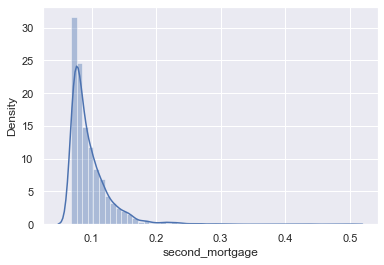

In [24]:
sns.distplot(top_2500['second_mortgage'])

#### The majority percentage of households with a second mortgage is around 7% in top 2500 location.

In [25]:
data_map = top_2500[['state', 'state_ab', 'city', 'place', 'type', 'zip_code', 'area_code', 'lat', 'lng', 'second_mortgage']]
data_map.head()

state state_ab         city            place  type zip_code  \
3285        Virginia       VA    Farmville        Farmville  Town    23901   
11980  Massachusetts       MA    Worcester   Worcester City  City     1610   
26018       New York       NY       Corona     Harbor Hills  City    11368   
7829        Maryland       MD  Glen Burnie      Glen Burnie   CDP    21061   
2077         Florida       FL        Tampa  Egypt Lake-leto  City    33614   

      area_code        lat        lng  second_mortgage  
3285        434  37.297357 -78.396452          0.50000  
11980       508  42.254262 -71.800347          0.43363  
26018       718  40.751809 -73.853582          0.31818  
7829        410  39.127273 -76.635265          0.30212  
2077        813  28.029063 -82.495395          0.28972

In [26]:
import folium

In [27]:
map = folium.Map(location=[37.09024, -95.712891], default_zoom_start=15)
map.choropleth(geo_data = "C:/Users/bnmwe/Desktop/Data Science Capstone/Project_1/gz_2010_us_040_00_5m.json",  
               data = data_map, 
               columns = ['zip_code', 'second_mortgage'],
               key_on = 'feature.properties.NAME', 
               fill_color = 'BuPu', fill_opacity = 0.5, line_opacity = 0.3,
               legend_name = 'second_mortgage'
              )

C:\Users\bnmwe\anaconda3\lib\site-packages\folium\folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [28]:
map

#### I couldn't find UAS city or zip code geo-json data for geo-map. I probably need to download other type data, such as Shapefile, then convert it to json data. I will explore more.

#### Bad Debt Equation:
Bad Debt = P (Second Mortgage ∩ Home Equity Loan)  
Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage 

In [29]:
top_2500['bad_debt'] = top_2500['second_mortgage'] + top_2500['home_equity'] - top_2500['home_equity_second_mortgage']

In [30]:
top_2500['good_debt'] = top_2500['debt'] - top_2500['bad_debt']

In [31]:
top_2500.head()

UID COUNTYID STATEID          state state_ab         city  \
3285   289712      147      51       Virginia       VA    Farmville   
11980  251185       27      25  Massachusetts       MA    Worcester   
26018  269323       81      36       New York       NY       Corona   
7829   251324        3      24       Maryland       MD  Glen Burnie   
2077   235788       57      12        Florida       FL        Tampa   

                 place  type zip_code area_code        lat        lng  \
3285         Farmville  Town    23901       434  37.297357 -78.396452   
11980   Worcester City  City     1610       508  42.254262 -71.800347   
26018     Harbor Hills  City    11368       718  40.751809 -73.853582   
7829       Glen Burnie   CDP    21061       410  39.127273 -76.635265   
2077   Egypt Lake-leto  City    33614       813  28.029063 -82.495395   

           ALand  AWater   pop  male_pop  female_pop   rent_mean  rent_median  \
3285    413391.0       0  1733       609        1124   782.00000        781.0   
11980   797165.0       0  2133      1139         994   942.32740        953.0   
26018   169666.0       0  4181      2249        1932  1413.12357       1388.0   
7829   1110282.0       0  4866      1985        2881  1335.49818       1335.0   
2077   2050906.0  234794  5468      2784        2684   914.10322        880.0   

       rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  \
3285     22.95830            11.00000          11.0     1.00000     1.00000   
11980   304.34109           333.88019         645.0     0.98906     0.97813   
26018   499.47343           205.65925         777.0     1.00000     0.92664   
7829    336.92824           352.62444        1502.0     1.00000     0.91545   
2077    191.64962          1067.77502        1847.0     0.96619     0.92794   

       rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  \
3285      1.00000     1.00000     1.00000     1.00000     1.00000     0.00000   
11980     0.86250     0.81563     0.68438     0.53281     0.47500     0.39063   
26018     0.80952     0.69241     0.58301     0.44659     0.37967     0.30245   
7829      0.77763     0.60186     0.49001     0.42011     0.38016     0.23435   
2077      0.80820     0.58925     0.44235     0.37140     0.22783     0.17350   

       universe_samples  used_samples      hi_mean  hi_median     hi_stdev  \
3285                 11            11  33088.92156    23236.0  19970.41249   
11980               655           640  39036.18368    29037.0  42317.65457   
26018               821           777  56434.63436    46106.0  47279.53535   
7829               1502          1502  59466.62302    50164.0  37351.26266   
2077               1965          1804  48495.17313    38340.0  41137.53473   

       hi_sample_weight  hi_samples  family_mean  family_median  family_stdev  \
3285           16.33316        19.0  47067.92731        59954.0   24030.19608   
11980         599.87224       768.0  50471.95789        40476.0   45794.28515   
26018         674.74625       997.0  48558.91165        40462.0   35569.90113   
7829         1293.31194      2068.0  64899.68626        50705.0   39727.56212   
2077         1664.02791      2179.0  52332.06236        39980.0   41386.75431   

       family_sample_weight  family_samples  hc_mortgage_mean  \
3285                5.33316             8.0        2249.50000   
11980             314.09134           432.0        1596.15811   
26018             630.41529           878.0        3037.81395   
7829              706.84520          1125.0        1622.29005   
2077              755.11681          1010.0        1641.00508   

       hc_mortgage_median  hc_mortgage_stdev  hc_mortgage_sample_weight  \
3285               2249.0          182.57419                    0.79359   
11980              1690.0          465.71234                   30.05003   
26018              3320.0          888.70919                   29.17150   
7829               1520.0          511.53797    

In [32]:
list_gd = top_2500['good_debt'].tolist()
list_gd[:5]

[0.0, 0.41592999999999997, 0.38068, 0.4947100000000001, 0.40186999999999995]

In [33]:
#top 5 debt
debt = top_2500[['debt']].values[:5]
debt

array([[0.5    ],
       [0.84956],
       [0.78409],
       [0.87633],
       [0.78972]])

In [34]:
good_bad_debt = top_2500[['good_debt', 'bad_debt']].values[:5]
good_bad_debt

array([[0.     , 0.5    ],
       [0.41593, 0.43363],
       [0.38068, 0.40341],
       [0.49471, 0.38162],
       [0.40187, 0.38785]])

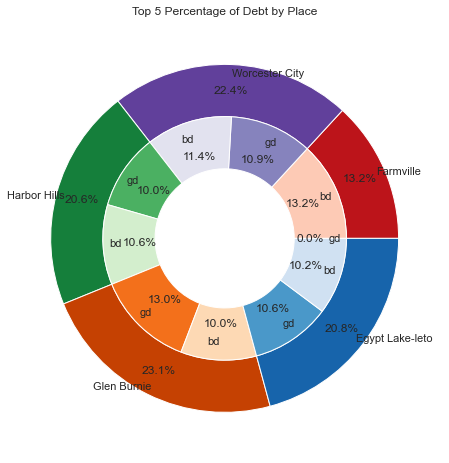

In [35]:
fig, ax = plt.subplots(figsize = (10, 8))

size = 0.3
cmap1 = plt.cm.Reds
cmap2 = plt.cm.Purples
cmap3 = plt.cm.Greens
cmap4 = plt.cm.Oranges
cmap5 = plt.cm.Blues
outer_colors = [cmap1(.8), cmap2(.8), cmap3(.8), cmap4(.8), cmap5(.8)]
inner_colors = [*cmap1(np.linspace(.6, .2, 2)),
                *cmap2(np.linspace(.6, .2, 2)),
                *cmap3(np.linspace(.6, .2, 2)),
                *cmap4(np.linspace(.6, .2, 2)),
                *cmap5(np.linspace(.6, .2, 2))]

labels = top_2500['place'].values[:5]
labels_gb = tuple(['gd', 'bd']*5)
ax.pie(debt.flatten(), labels = labels, radius=1, autopct='%1.1f%%', pctdistance=0.85, labeldistance = 0.95, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(good_bad_debt.flatten(), labels = labels_gb, autopct='%1.1f%%', pctdistance=0.7, labeldistance = 0.85, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Top 5 Percentage of Debt by Place')
plt.show()

In [36]:
cities = top_2500['city'].value_counts()[:10].index
cities

CategoricalIndex(['Chicago', 'Los Angeles', 'Washington', 'Brooklyn', 'Aurora',
                  'Milwaukee', 'Jacksonville', 'Denver', 'Charlotte',
                  'Las Vegas'],
                 categories=['Abbeville', 'Aberdeen', 'Abilene', 'Abingdon', 'Abington', 'Accokeek', 'Acton', 'Acushnet', ...], ordered=False, dtype='category')

In [37]:
boxplot_data = top_2500[top_2500['city'].isin (cities)]

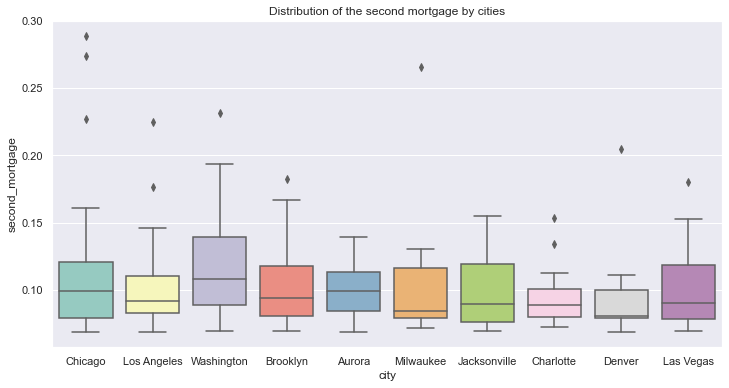

In [38]:
#second mortgage distribution in top 10 citiess
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'city', y = 'second_mortgage', data = boxplot_data, order = ['Chicago', 'Los Angeles', 'Washington', 'Brooklyn', 'Aurora',
                  'Milwaukee', 'Jacksonville', 'Charlotte', 'Denver',
                  'Las Vegas'], palette="Set3")
plt.title('Distribution of the second mortgage by cities')
plt.show()

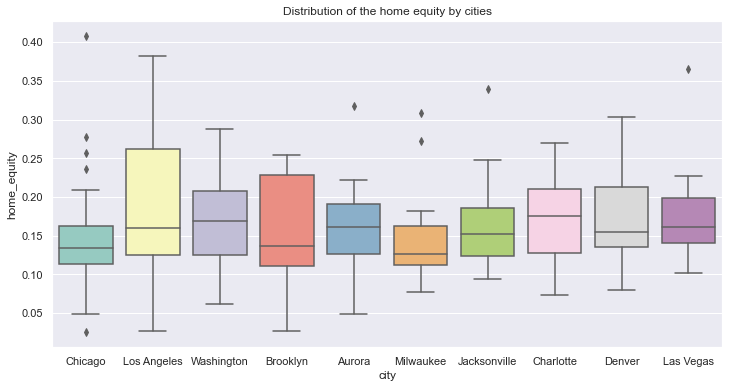

In [39]:
#home equity distribution in top 10 citiess
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'city', y = 'home_equity', data = boxplot_data, order = ['Chicago', 'Los Angeles', 'Washington', 'Brooklyn', 'Aurora',
                  'Milwaukee', 'Jacksonville', 'Charlotte', 'Denver',
                  'Las Vegas'], palette="Set3")
plt.title('Distribution of the home equity by cities')
plt.show()

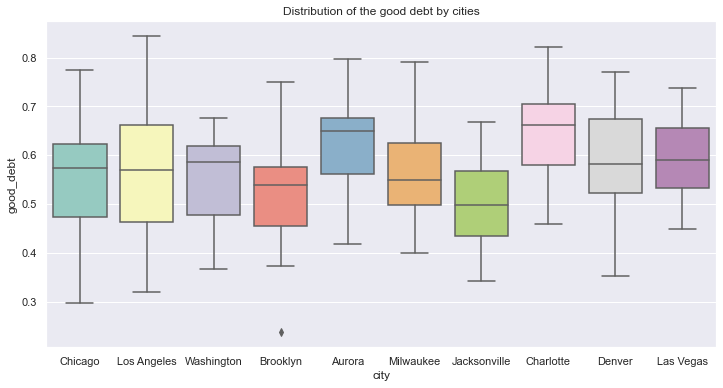

In [40]:
#good debt distribution in top 10 citiess
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'city', y = 'good_debt', data = boxplot_data, order = ['Chicago', 'Los Angeles', 'Washington', 'Brooklyn', 'Aurora',
                  'Milwaukee', 'Jacksonville', 'Charlotte', 'Denver',
                  'Las Vegas'], palette="Set3")
plt.title('Distribution of the good debt by cities')
plt.show()

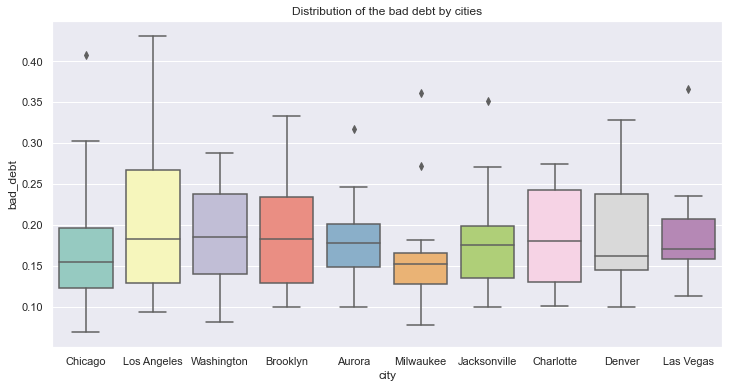

In [41]:
#bad debt distribution in top 10 citiess
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'city', y = 'bad_debt', data = boxplot_data, order = ['Chicago', 'Los Angeles', 'Washington', 'Brooklyn', 'Aurora',
                  'Milwaukee', 'Jacksonville', 'Charlotte', 'Denver',
                  'Las Vegas'], palette="Set3")
plt.title('Distribution of the bad debt by cities')
plt.show()

In [42]:
top_2500.head()

UID COUNTYID STATEID          state state_ab         city  \
3285   289712      147      51       Virginia       VA    Farmville   
11980  251185       27      25  Massachusetts       MA    Worcester   
26018  269323       81      36       New York       NY       Corona   
7829   251324        3      24       Maryland       MD  Glen Burnie   
2077   235788       57      12        Florida       FL        Tampa   

                 place  type zip_code area_code        lat        lng  \
3285         Farmville  Town    23901       434  37.297357 -78.396452   
11980   Worcester City  City     1610       508  42.254262 -71.800347   
26018     Harbor Hills  City    11368       718  40.751809 -73.853582   
7829       Glen Burnie   CDP    21061       410  39.127273 -76.635265   
2077   Egypt Lake-leto  City    33614       813  28.029063 -82.495395   

           ALand  AWater   pop  male_pop  female_pop   rent_mean  rent_median  \
3285    413391.0       0  1733       609        1124   782.00000        781.0   
11980   797165.0       0  2133      1139         994   942.32740        953.0   
26018   169666.0       0  4181      2249        1932  1413.12357       1388.0   
7829   1110282.0       0  4866      1985        2881  1335.49818       1335.0   
2077   2050906.0  234794  5468      2784        2684   914.10322        880.0   

       rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  \
3285     22.95830            11.00000          11.0     1.00000     1.00000   
11980   304.34109           333.88019         645.0     0.98906     0.97813   
26018   499.47343           205.65925         777.0     1.00000     0.92664   
7829    336.92824           352.62444        1502.0     1.00000     0.91545   
2077    191.64962          1067.77502        1847.0     0.96619     0.92794   

       rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  \
3285      1.00000     1.00000     1.00000     1.00000     1.00000     0.00000   
11980     0.86250     0.81563     0.68438     0.53281     0.47500     0.39063   
26018     0.80952     0.69241     0.58301     0.44659     0.37967     0.30245   
7829      0.77763     0.60186     0.49001     0.42011     0.38016     0.23435   
2077      0.80820     0.58925     0.44235     0.37140     0.22783     0.17350   

       universe_samples  used_samples      hi_mean  hi_median     hi_stdev  \
3285                 11            11  33088.92156    23236.0  19970.41249   
11980               655           640  39036.18368    29037.0  42317.65457   
26018               821           777  56434.63436    46106.0  47279.53535   
7829               1502          1502  59466.62302    50164.0  37351.26266   
2077               1965          1804  48495.17313    38340.0  41137.53473   

       hi_sample_weight  hi_samples  family_mean  family_median  family_stdev  \
3285           16.33316        19.0  47067.92731        59954.0   24030.19608   
11980         599.87224       768.0  50471.95789        40476.0   45794.28515   
26018         674.74625       997.0  48558.91165        40462.0   35569.90113   
7829         1293.31194      2068.0  64899.68626        50705.0   39727.56212   
2077         1664.02791      2179.0  52332.06236        39980.0   41386.75431   

       family_sample_weight  family_samples  hc_mortgage_mean  \
3285                5.33316             8.0        2249.50000   
11980             314.09134           432.0        1596.15811   
26018             630.41529           878.0        3037.81395   
7829              706.84520          1125.0        1622.29005   
2077              755.11681          1010.0        1641.00508   

       hc_mortgage_median  hc_mortgage_stdev  hc_mortgage_sample_weight  \
3285               2249.0          182.57419                    0.79359   
11980              1690.0          465.71234                   30.05003   
26018              3320.0          888.70919                   29.17150   
7829               1520.0          511.53797    

In [43]:
top_2500['remaining_income'] = top_2500['family_median'] - top_2500['hi_median']

In [44]:
income_data = top_2500[['family_median', 'hi_median', 'remaining_income']]
income_data.head()

family_median  hi_median  remaining_income
3285         59954.0    23236.0           36718.0
11980        40476.0    29037.0           11439.0
26018        40462.0    46106.0           -5644.0
7829         50705.0    50164.0             541.0
2077         39980.0    38340.0            1640.0

Text(0.5, 1.0, 'Distribution of incomes')

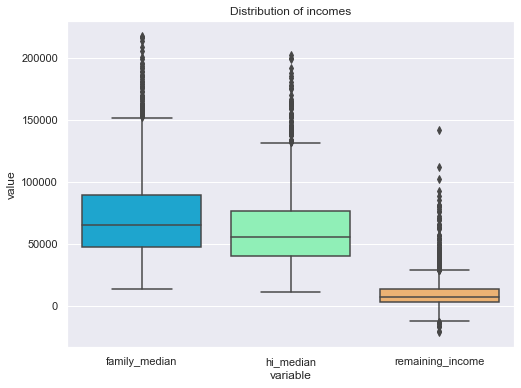

In [45]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(income_data), palette = 'rainbow').set_title('Distribution of incomes', fontsize = 12)


#### Project Task: Week 2
##### Exploratory Data Analysis (EDA):

  1. Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements):

    a) Use pop and ALand variables to create a new field called population density

    b) Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age c) Visualize the findings using appropriate chart type

  2. Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

    a) Analyze the married, separated, and divorced population for these population brackets

    b) Visualize using appropriate chart type

  3. Please detail your observations for rent as a percentage of income at an overall level, and for different states.

  4. Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

#### Caculate population density and population median age:
pop_density = pop / ALand  
median_age = (male_pop * male_age_median + female_pop * femal_age_median) / (male_pop + female_pop)

In [46]:
data['pop_density'] = data['pop'] / data['ALand']

In [47]:
data['median_age'] = (data['male_pop']*data['male_age_median'] + data['female_pop']*data['female_age_median'])/(data['male_pop']+data['female_pop'])

In [48]:
data.head()

UID COUNTYID STATEID        state state_ab        city           place  \
0  267822       53      36     New York       NY    Hamilton        Hamilton   
1  246444      141      18      Indiana       IN  South Bend        Roseland   
2  245683       63      18      Indiana       IN    Danville        Danville   
3  279653      127      72  Puerto Rico       PR    San Juan        Guaynabo   
4  247218      161      20       Kansas       KS   Manhattan  Manhattan City   

    type zip_code area_code        lat        lng        ALand   AWater   pop  \
0   City    13346       315  42.840812 -75.501524  202183361.0  1699120  5230   
1   City    46616       574  41.701441 -86.266614    1560828.0   100363  2633   
2   City    46122       317  39.792202 -86.515246   69561595.0   284193  6881   
3  Urban      927       787  18.396103 -66.104169    1105793.0        0  2700   
4   City    66502       785  39.195573 -96.569366    2554403.0        0  5637   

   male_pop  female_pop  rent_mean  rent_median  rent_stdev  \
0      2612        2618  769.38638        784.0   232.63967   
1      1349        1284  804.87924        848.0   253.46747   
2      3643        3238  742.77365        703.0   323.39011   
3      1141        1559  803.42018        782.0   297.39258   
4      2586        3051  938.56493        881.0   392.44096   

   rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  rent_gt_20  \
0           272.34441         362.0     0.86761     0.79155     0.59155   
1           312.58622         513.0     0.97410     0.93227     0.69920   
2           291.85520         378.0     0.95238     0.88624     0.79630   
3           259.30316         368.0     0.94693     0.87151     0.69832   
4          1005.42886        1704.0     0.99286     0.98247     0.91688   

   rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  \
0     0.45634     0.42817     0.18592     0.15493     0.12958   
1     0.69920     0.55179     0.41235     0.39044     0.27888   
2     0.66667     0.39153     0.39153     0.28307     0.15873   
3     0.61732     0.51397     0.46927     0.35754     0.32961   
4     0.84740     0.78247     0.60974     0.55455     0.44416   

   universe_samples  used_samples      hi_mean  hi_median     hi_stdev  \
0               387           355  63125.28406    48120.0  49042.01206   
1               542           502  41931.92593    35186.0  31639.50203   
2               459           378  84942.68317    74964.0  56811.62186   
3               438           358  48733.67116    37845.0  45100.54010   
4              1725          1540  31834.15466    22497.0  34046.50907   

   hi_sample_weight  hi_samples  family_mean  family_median  family_stdev  \
0        1290.96240      2024.0  67994.14790        53245.0   47667.30119   
1         838.74664      1127.0  50670.10337        43023.0   34715.57548   
2        1155.20980      2488.0  95262.51431        85395.0   49292.67664   
3         928.32193      1267.0  56401.68133        44399.0   41082.90515   
4        1548.67477      1983.0  54053.42396        50272.0   39609.12605   

   family_sample_weight  family_samples  hc_mortgage_mean  hc_mortgage_median  \
0             884.33516          1491.0        1414.80295              1223.0   
1             375.28798           554.0         864.41390               784.0   
2             709.74925          1889.0        1506.06758              1361.0   
3             490.18479           729.0        1175.28642              1101.0   
4             244.08903           395.0        1192.58759              1125.0   

   hc_mortgage_stdev  hc_mortgage_sample_weight  hc_mortgage_samples  \
0          641.22898                  377.83135                867.0   
1          482.27020                  316.88320                356.0   
2          731.89394                  699.41354               1491.0   
3          428.98751                  261.28471                437.0   
4          327.49674                   76.61052               

In [49]:
data.describe()

ALand        AWater           pop      male_pop    female_pop  \
count  2.716100e+04  2.716100e+04  27161.000000  27161.000000  27161.000000   
mean   1.300509e+08  6.542839e+06   4324.547218   2126.436950   2198.110268   
std    1.279231e+09  2.193149e+08   2131.542105   1078.082819   1093.471441   
min    4.113400e+04  0.000000e+00      0.000000      0.000000      0.000000   
25%    1.809071e+06  0.000000e+00   2895.000000   1409.000000   1461.000000   
50%    4.888017e+06  2.779500e+04   4049.000000   1981.000000   2061.000000   
75%    3.373467e+07  5.252160e+05   5435.000000   2670.000000   2766.000000   
max    1.039510e+11  2.453228e+10  53812.000000  27962.000000  27250.000000   

          rent_mean   rent_median    rent_stdev  rent_sample_weight  \
count  27161.000000  27161.000000  27161.000000        27161.000000   
mean    1055.344777   1007.852781    394.419068          294.987443   
std      435.494175    441.787439    186.350486          268.758278   
min      117.150000    104.000000     18.257420            0.343000   
25%      745.440070    704.000000    264.493450          102.904980   
50%      957.689350    901.000000    348.791280          221.761000   
75%     1256.745770   1195.000000    473.635270          404.951830   
max     3962.342290   3972.000000   1556.383030         3060.247900   

       rent_samples    rent_gt_10    rent_gt_15    rent_gt_20    rent_gt_25  \
count  27161.000000  27161.000000  27161.000000  27161.000000  27161.000000   
mean     546.209926      0.957880      0.867144      0.739364      0.612774   
std      453.921602      0.062297      0.108752      0.142873      0.159344   
min        4.000000      0.000000      0.000000      0.000000      0.000000   
25%      223.000000      0.941140      0.820060      0.663030      0.518020   
50%      428.000000      0.976510      0.886960      0.756730      0.622870   
75%      736.000000      1.000000      0.940000      0.836300      0.721210   
max     6281.000000      1.000000      1.000000      1.000000      1.000000   

         rent_gt_30    rent_gt_35    rent_gt_40    rent_gt_50  \
count  27161.000000  27161.000000  27161.000000  27161.000000   
mean       0.499869      0.410941      0.345364      0.254420   
std        0.162961      0.159176      0.152264      0.136886   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.397440      0.308150      0.244360      0.161760   
50%        0.502070      0.410260      0.340220      0.244440   
75%        0.607020      0.513790      0.439470      0.334670   
max        1.000000      1.000000      1.000000      1.000000   

       universe_samples  used_samples        hi_mean      hi_median  \
count      27161.000000  27161.000000   27161.000000   27161.000000   
mean         573.999374    528.215640   70500.318611   57624.340766   
std          459.735280    445.103892   29978.787873   28937.645331   
min            0.000000      0.000000    4999.846690    4790.000000   
25%          252.000000    211.000000   49364.525610   37594.000000   
50%          455.000000    409.000000   64335.984070   51564.000000   
75%          771.000000    718.000000   85601.089400   70569.000000   
max         6648.000000   6094.000000  297142.857100  296897.000000   

            hi_stdev  hi_sample_weight    hi_samples    family_mean  \
count   27161.000000      27161.000000  27161.000000   27161.000000   
mean    54501.465013        924.151692   1610.055502   79045.667606   
std     17500.400218        448.406764    745.017305   31183.986149   
min      1825.741860          0.114260      3.000000    5374.842520   
25%     42251.058970        603.052010   1101.000000   57087.193670   
50%     52414.666100        867.391180   1526.000000   73207.897690   
75%     65209.296190       1176.469520   2014.000000   95744.042440   
max    135902.619500      10931.975610  20395.000000  242857.142900   

       family_median   family_stdev  family_sample_weight  family_samples  \
count  

C:\Users\bnmwe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pop_density', ylabel='Density'>

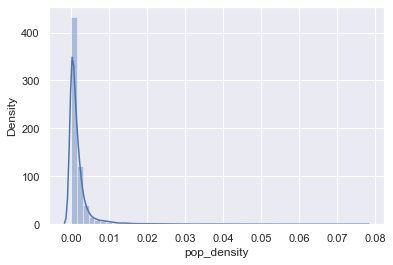

In [50]:
sns.distplot(data['pop_density'])

C:\Users\bnmwe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pop_density', ylabel='Density'>

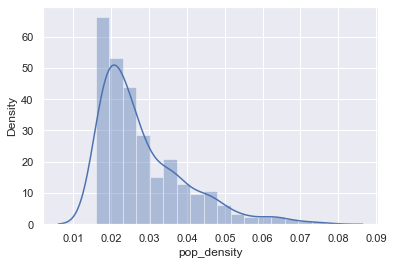

In [51]:
sns.distplot(data['pop_density'].nlargest(500))

In [52]:
top_500_pop_density = data.nlargest(500, 'pop_density')
top_500_pop_density.head()

UID COUNTYID STATEID       state state_ab           city  \
14417  268571       61      36    New York       NY       New York   
21050  268455       61      36    New York       NY       New York   
10251  268575       61      36    New York       NY       New York   
1546   268443       61      36    New York       NY       New York   
21795  230206       75       6  California       CA  San Francisco   

                   place  type zip_code area_code        lat         lng  \
14417  Mount Vernon City  City    10032       212  40.836626  -73.942098   
21050      New York City  City    10028       212  40.774922  -73.953815   
10251  Mount Vernon City  City    10032       212  40.842895  -73.938379   
1546       New York City  City    10021       212  40.768467  -73.958526   
21795     Daly City City  City    94102       415  37.783933 -122.412595   

          ALand  AWater    pop  male_pop  female_pop   rent_mean  rent_median  \
14417  212070.0       0  16231      8315        7916  1097.75165       1037.0   
21050  182091.0       0  13162      5597        7565  2239.95136       2169.0   
10251  169349.0       0  12189      6110        6079  1222.62706       1140.0   
1546   183653.0       0  12427      5425        7002  2024.41442       1818.0   
21795   61277.0       0   4101      2465        1636   547.71547        416.0   

       rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  \
14417   501.98258          2068.08967        4548.0     0.97002     0.87672   
21050   938.09389           886.99465        4978.0     0.94162     0.80472   
10251   565.19897          1505.76374        3795.0     0.95813     0.91869   
1546    901.99651           677.89256        4431.0     0.83067     0.73519   
21795   375.40422          1832.64033        2194.0     0.97267     0.90142   

       rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  \
14417     0.77079     0.63354     0.56322     0.51025     0.43363     0.31102   
21050     0.68145     0.48088     0.38100     0.29719     0.22539     0.19752   
10251     0.83090     0.70421     0.55348     0.49757     0.42437     0.34090   
1546      0.64335     0.54558     0.43710     0.33022     0.27347     0.21536   
21795     0.83114     0.76330     0.51147     0.42606     0.32552     0.19424   

       universe_samples  used_samples       hi_mean  hi_median      hi_stdev  \
14417              4701          4437   45029.60933    35453.0   37941.05166   
21050              5092          4916  135045.85990   119486.0   98931.26586   
10251              3795          3702   48159.75788    37277.0   41368.91929   
1546               4673          4388  138436.93800   103021.0  107882.47550   
21795              2209          2049   21645.16522    12375.0   24920.33119   

       hi_sample_weight  hi_samples   family_mean  family_median  \
14417        3439.38024      4825.0   47552.14726        39283.0   
21050        2434.96828      7262.0  188269.97850       213908.0   
10251        2654.58377      3840.0   51390.96215        40291.0   
1546         2614.72615      7075.0  190984.72490       220296.0   
21795        1840.97081      2229.0   43893.17209        24463.0   

       family_stdev  family_sample_weight  family_samples  hc_mortgage_mean  \
14417   35322.38926            2156.69550          3067.0        1629.26050   
21050   72087.23514             358.61741          2389.0        3008.88805   
10251   40406.13999            1466.22299          2119.0        4462.34229   
1546    77545.98726             507.22382          2672.0        2414.56913   
21795   36985.60531             366.45921           484.0        1629.26050   

       hc_mortgage_median  hc_mortgage_stdev  hc_mortgage_sample_weight  \
14417         1550.778996         622.686711                 287.836433   
21050         3095.000000        1180.658670                 337.428530   
10251         4472.000000         247.263740                   1.584000   
1546          2229

In [53]:
top_500_pop_density['city'].unique().to_list()[:10]

['New York',
 'San Francisco',
 'Bronx',
 'Brooklyn',
 'Elmhurst',
 'Flushing',
 'Jackson Heights',
 'Long Island City',
 'Forest Hills',
 'Trenton']

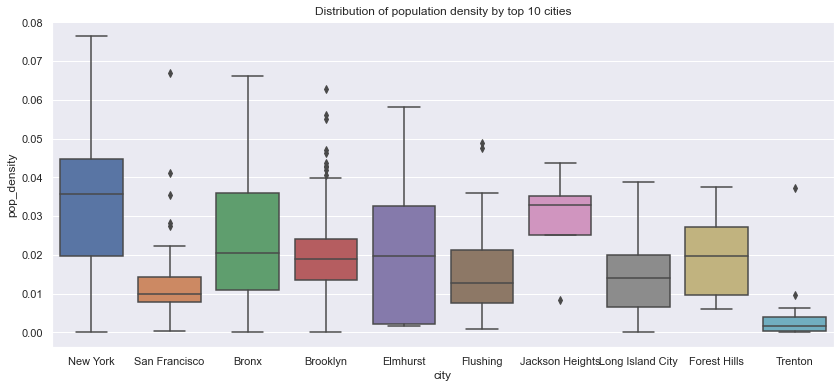

In [54]:
plt.figure(figsize = (14, 6))
sns.boxplot(x = 'city', y = 'pop_density', data = data, order = ['New York', 'San Francisco', 'Bronx', 'Brooklyn', 'Elmhurst', 'Flushing', 'Jackson Heights', 'Long Island City', 'Forest Hills', 'Trenton'])
plt.title('Distribution of population density by top 10 cities')
plt.show()

#### We can see that New York city has the highest population density compared to other cities.

In [55]:
top_500_pop_density['state'].unique().to_list()[:10]

['New York',
 'California',
 'New Jersey',
 'Illinois',
 'Hawaii',
 'Maryland',
 'Massachusetts',
 'District of Columbia',
 'Virginia',
 'Pennsylvania']

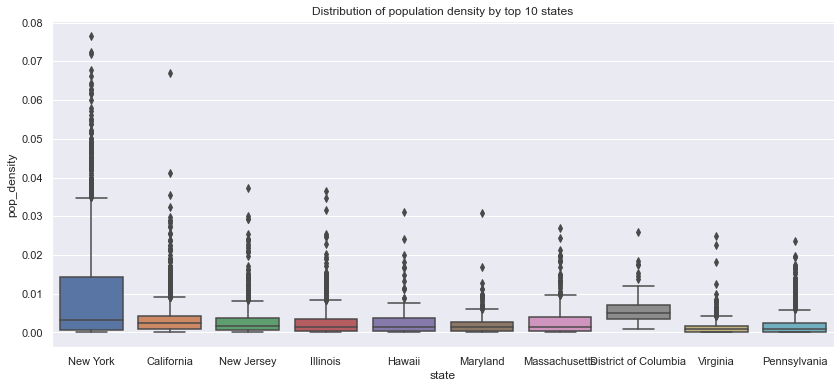

In [56]:
plt.figure(figsize = (14, 6))
sns.boxplot(x = 'state', y = 'pop_density', data = data, order = ['New York', 'California', 'New Jersey', 'Illinois', 'Hawaii', 'Maryland', 'Massachusetts', 'District of Columbia', 'Virginia', 'Pennsylvania'])
plt.title('Distribution of population density by top 10 states')
plt.show()

#### In top 10 states, population density is distributed quiet evenly. District of Columbia has relatively higher population density.

In [57]:
top_500_median_age = data.nlargest(500, 'median_age')
top_500_median_age.head()

UID COUNTYID STATEID       state state_ab           city  \
636    269720       81      36    New York       NY      Bellerose   
2923   237501       99      12     Florida       FL  Boynton Beach   
7017   237484       99      12     Florida       FL   Delray Beach   
21213  224454       13       6  California       CA      Lafayette   
15501  252075       31      24    Maryland       MD  Silver Spring   

                   place  type zip_code area_code        lat         lng  \
636         Lake Success  City    11426       718  40.756638  -73.714223   
2923                Golf  City    33437       561  26.516990  -80.131141   
7017   Delray Beach City  City    33484       561  26.460120  -80.154029   
21213        Castle Hill  City    94549       925  37.852622 -122.065147   
15501      Leisure World   CDP    20906       301  39.104882  -77.060991   

           ALand  AWater   pop  male_pop  female_pop    rent_mean  \
636     474842.0       0  1947       694        1253  2322.623600   
2923   1286250.0       0  1366       643         723  1055.344777   
7017   1263139.0       0  2849      1281        1568   837.316960   
21213  2429609.0       0  2441       786        1655  1091.238620   
15501   919549.0   16143  3575      1349        2226  1207.056840   

       rent_median  rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  \
636    2501.000000  577.797830           13.950990    124.000000     0.92742   
2923   1007.852781  394.419068          294.987443    546.209926     0.95788   
7017    791.000000  330.789780          115.741060    158.000000     1.00000   
21213  1038.000000  197.703580           32.010710     96.000000     1.00000   
15501  1259.000000  426.689860          147.720820    409.000000     0.91690   

       rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  \
636      0.854840    0.782260    0.701610    0.701610    0.338710    0.338710   
2923     0.867144    0.739364    0.612774    0.499869    0.410941    0.345364   
7017     0.924050    0.835440    0.759490    0.677220    0.677220    0.417720   
21213    1.000000    1.000000    0.822920    0.822920    0.541670    0.541670   
15501    0.875350    0.836570    0.797780    0.722990    0.603880    0.407200   

       rent_gt_50  universe_samples  used_samples      hi_mean  hi_median  \
636       0.20968               124           124  76091.60133    58746.0   
2923      0.25442                12             0  55680.07052    38493.0   
7017      0.07595               186           158  50705.22494    32307.0   
21213     0.19792               145            96  62113.89706    44128.0   
15501     0.22715               564           361  73740.48036    56364.0   

          hi_stdev  hi_sample_weight  hi_samples  family_mean  family_median  \
636    65004.77591         829.91573      1522.0  99042.54376        76007.0   
2923   48740.98815         593.05784       816.0  66814.17216        50677.0   
7017   52990.63747        1448.50041      1926.0  67171.71777        47394.0   
21213  55065.20143        1198.18941      1824.0  78906.29489        63525.0   
15501  63860.56731        1354.56603      2342.0  84222.35207        73603.0   

       family_stdev  family_sample_weight  family_samples  hc_mortgage_mean  \
636     70564.72267             187.42501           397.0        1818.68233   
2923    42081.36920             271.45908           432.0        1439.52903   
7017    53401.82150             466.85519           712.0        1128.33803   
21213   60524.49267             321.08874           569.0        2239.44338   
15501   51728.36297             436.43710           999.0        1759.47054   

       hc_mortgage_median  hc_mortgage_stdev  hc_mortgage_sample_weight  \
636                1680.0          786.48106                   97.40609   
2923               1391.0          518.98610                  154.28237   
7017               1004.0          340.62372                  264.62431   
21213              2208.0     

In [58]:
top_500_median_age['city'].unique().to_list()[:10]

['Bellerose',
 'Boynton Beach',
 'Delray Beach',
 'Lafayette',
 'Silver Spring',
 'Walnut Creek',
 'Roseville',
 'Monroe Township',
 'Surprise',
 'Ruskin']

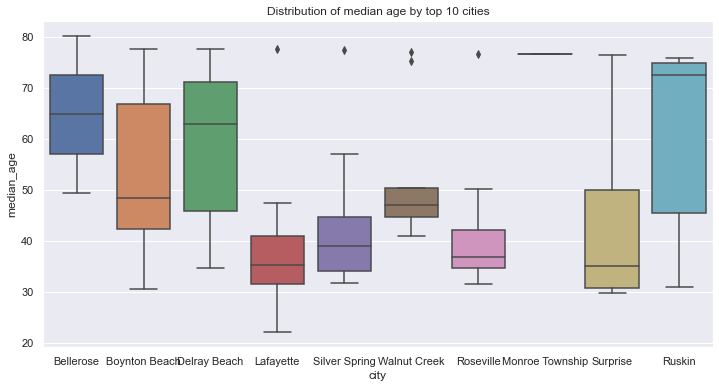

In [59]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'city', y = 'median_age', data = data, order = ['Bellerose', 'Boynton Beach', 'Delray Beach', 'Lafayette', 'Silver Spring', 'Walnut Creek', 'Roseville', 'Monroe Township', 'Surprise', 'Ruskin'])
plt.title('Distribution of median age by top 10 cities')
plt.show()

#### There is a big difference in the distribution of median age by cities. For example, Ruskin has a 73 median age, but lafayette only has 35 median age.

In [60]:
top_500_median_age['state'].unique().to_list()[:10]

['New York',
 'Florida',
 'California',
 'Maryland',
 'New Jersey',
 'Arizona',
 'Mississippi',
 'Nevada',
 'Pennsylvania',
 'Georgia']

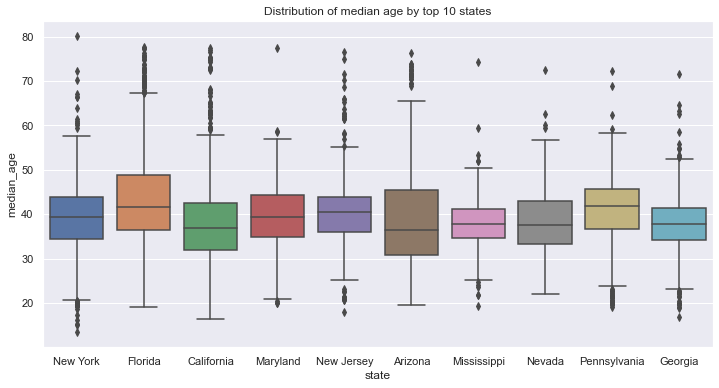

In [61]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'state', y = 'median_age', data = data, order = ['New York', 'Florida', 'California', 'Maryland', 'New Jersey', 'Arizona', 'Mississippi', 'Nevada', 'Pennsylvania', 'Georgia'])
plt.title('Distribution of median age by top 10 states')
plt.show()

#### The distribution of the median age is quiet even by states. The average of median age is about 40.

In [62]:
data[['male_age_median', 'male_age_mean', 'female_age_median', 'female_age_mean']].describe()

male_age_median  male_age_mean  female_age_median  female_age_mean
count     27161.000000   27161.000000       27161.000000     27161.000000
mean         38.114800      38.373671          40.395275        40.354614
std           7.822743       5.545961           7.961655         5.804741
min           9.750000      12.145830          13.250000        16.008330
25%          32.916670      35.074010          35.000000        36.956900
50%          37.916670      38.373671          40.583330        40.354614
75%          42.916670      41.393340          45.333330        43.554170
max          80.166670      77.759920          82.250000        79.837390

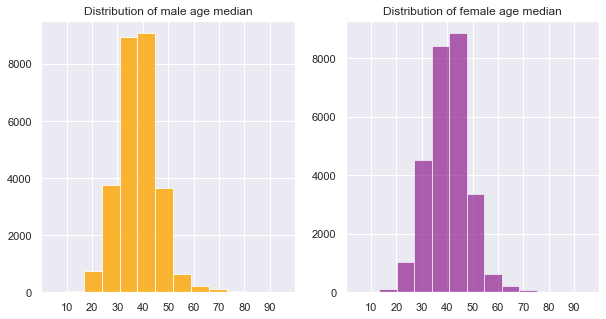

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

ax1.hist(data['male_age_median'], color = 'orange', alpha = 0.8)
ax1.set_xlim((0, 100))
ax1.set_title('Distribution of male age median')
ax1.set_xticks([10, 20, 30, 40, 50, 60, 70, 80, 90])

ax2.hist(data['female_age_median'], color = 'purple', alpha = 0.6)
ax2.set_xlim((0, 100))
ax2.set_title('Distribution of female age median')
ax2.set_xticks([10, 20, 30, 40, 50, 60, 70, 80, 90])

#### The IntelliSense Age Group defaults are: Youth (<18) Young Adult (18 to 35) Adult (36 to 55) Senior (56 and up). We can consider to divide age into 5 groups which are kids(<12), youth(<18), young adult(18 to 35), adult(36 to 55), senior(>55).

In [64]:
bins = [0, 12, 18, 36, 56, 100]
labels = ['kids', 'youth', 'young adult', 'adult', 'senior']

In [65]:
data['male_age_group'] = pd.cut(data['male_age_median'], bins = bins, labels = labels)
data['female_age_group'] = pd.cut(data['female_age_median'], bins = bins, labels = labels)

In [66]:
data[['median_age', 'male_age_group', 'female_age_group']].head()

median_age male_age_group female_age_group
0   44.667430          adult            adult
1   34.722748    young adult            adult
2   41.774472          adult            adult
3   49.879012          adult            adult
4   21.965629    young adult      young adult

In [67]:
data['state'].unique().to_list()

['New York',
 'Indiana',
 'Puerto Rico',
 'Kansas',
 'Alabama',
 'Texas',
 'South Carolina',
 'California',
 'Arkansas',
 'Maryland',
 'Illinois',
 'Iowa',
 'Tennessee',
 'Nevada',
 'Louisiana',
 'Colorado',
 'Rhode Island',
 'Mississippi',
 'New Jersey',
 'Oregon',
 'Arizona',
 'Florida',
 'Wisconsin',
 'Pennsylvania',
 'North Carolina',
 'Virginia',
 'Michigan',
 'Ohio',
 'Oklahoma',
 'Georgia',
 'Idaho',
 'South Dakota',
 'Minnesota',
 'Missouri',
 'Washington',
 'Wyoming',
 'Connecticut',
 'West Virginia',
 'Kentucky',
 'Massachusetts',
 'District of Columbia',
 'Hawaii',
 'Montana',
 'Alaska',
 'New Hampshire',
 'Utah',
 'Vermont',
 'Nebraska',
 'North Dakota',
 'New Mexico',
 'Maine',
 'Delaware']

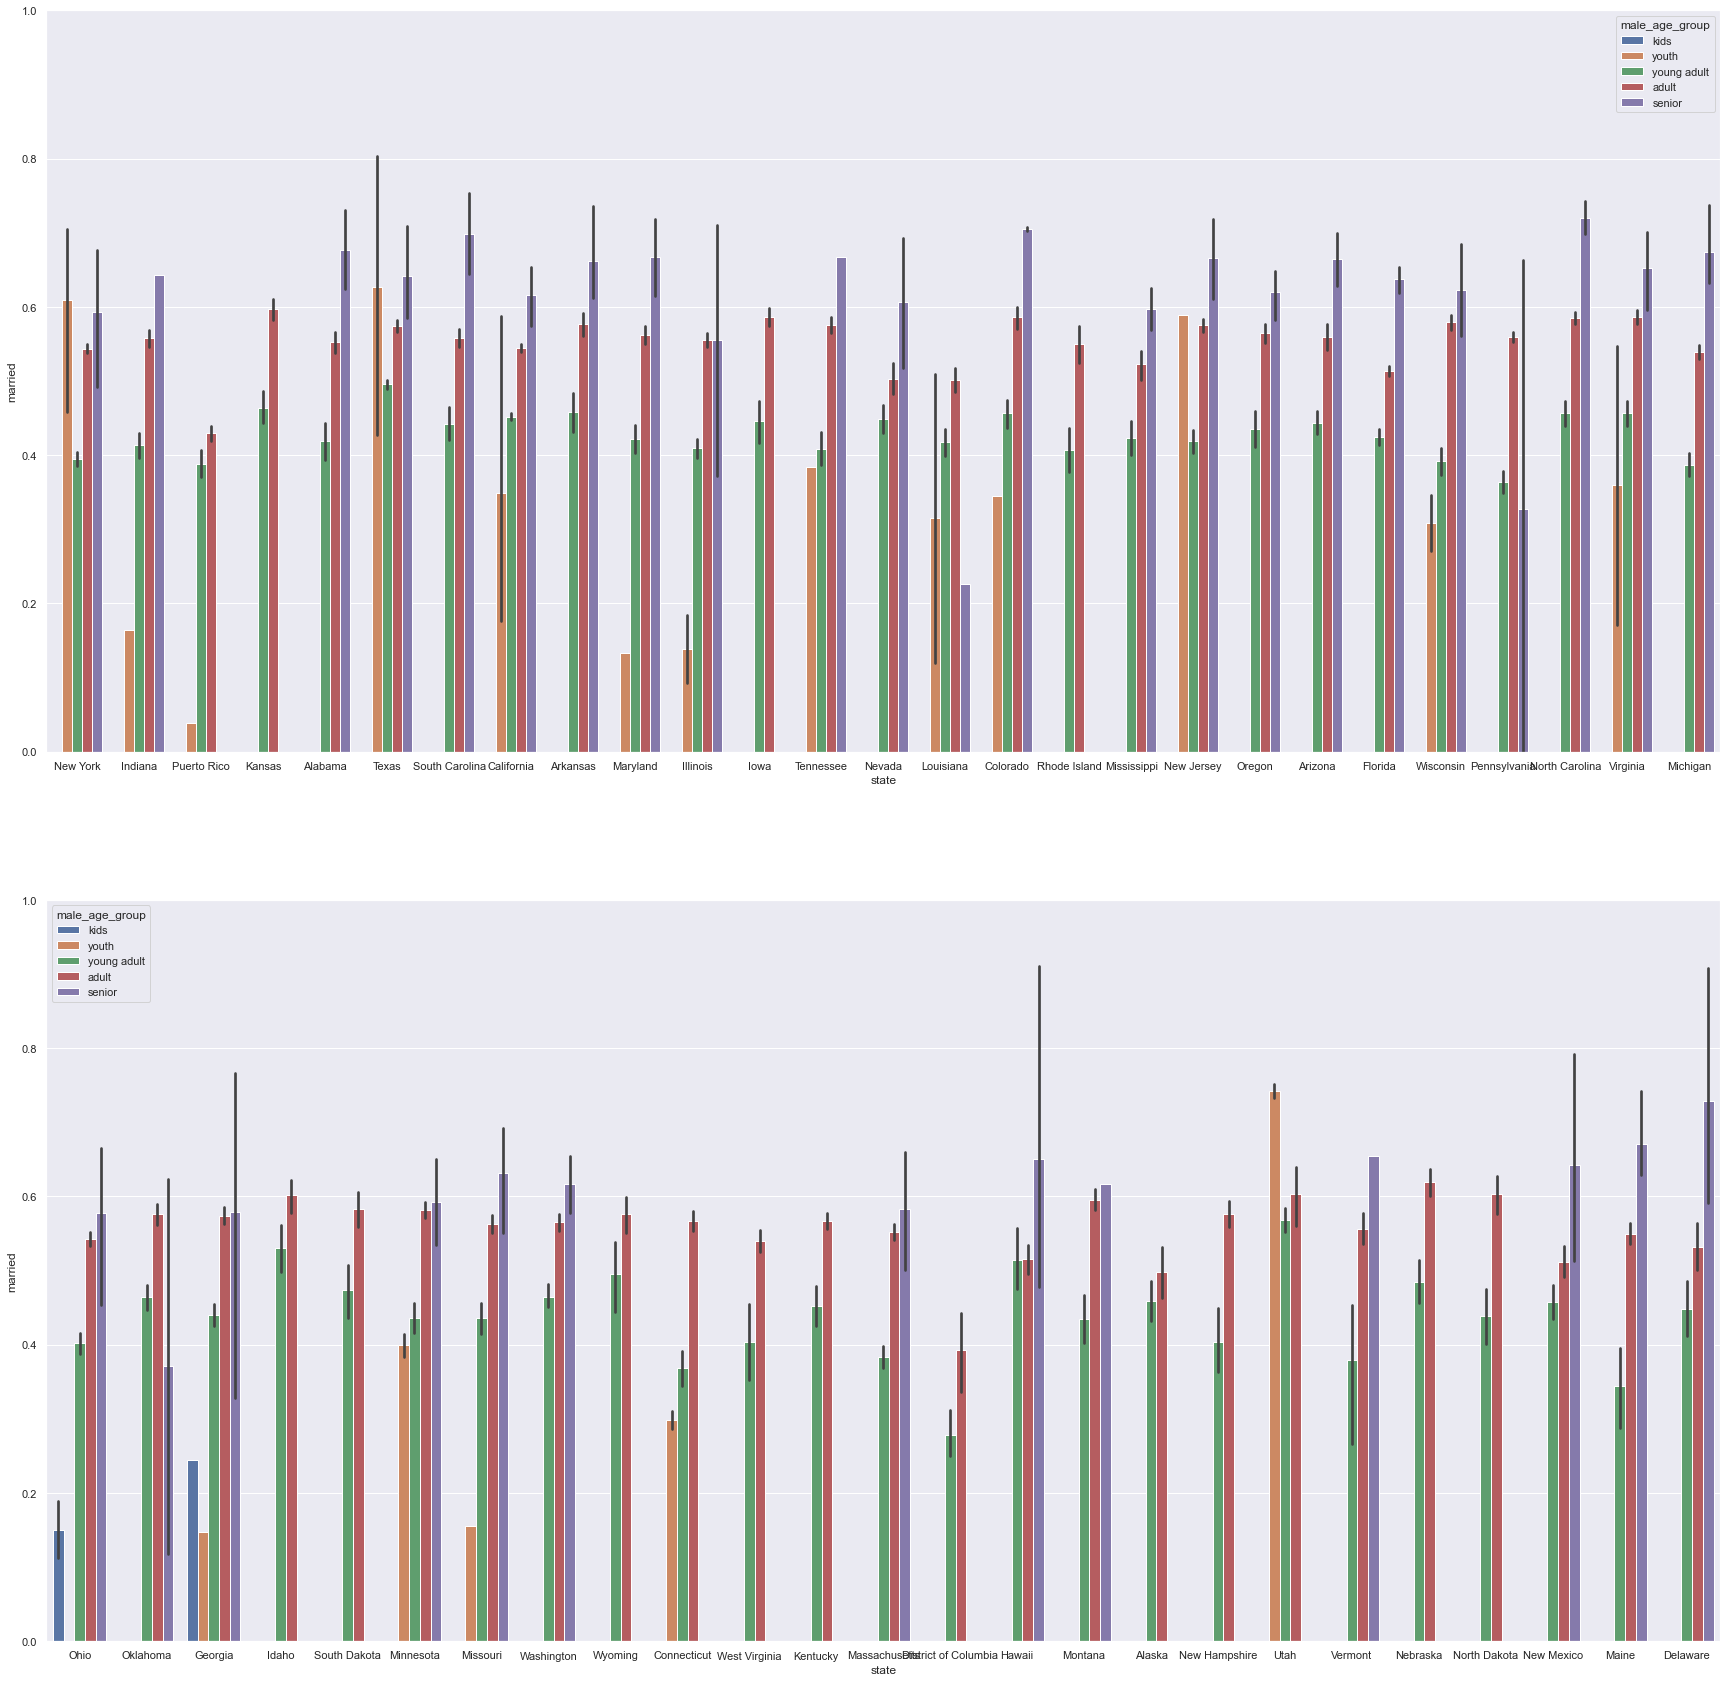

In [68]:
fig, axes = plt.subplots(2, 1, figsize = (30, 30))
sns.barplot(x = 'state', y = 'married', hue = 'male_age_group', ax = axes[0], order = data['state'].unique().to_list()[:27], data = data)
sns.barplot(x = 'state', y = 'married', hue = 'male_age_group', ax = axes[1], order = data['state'].unique().to_list()[27:], data = data)
axes[0].set_ylim((0, 1))
axes[1].set_ylim((0, 1))
plt.show()

#### Surprisely, Ohio and Georgia have married kids in male group. New York, Texas, New Jersey and Utah also have high ratio married youth in male group. 

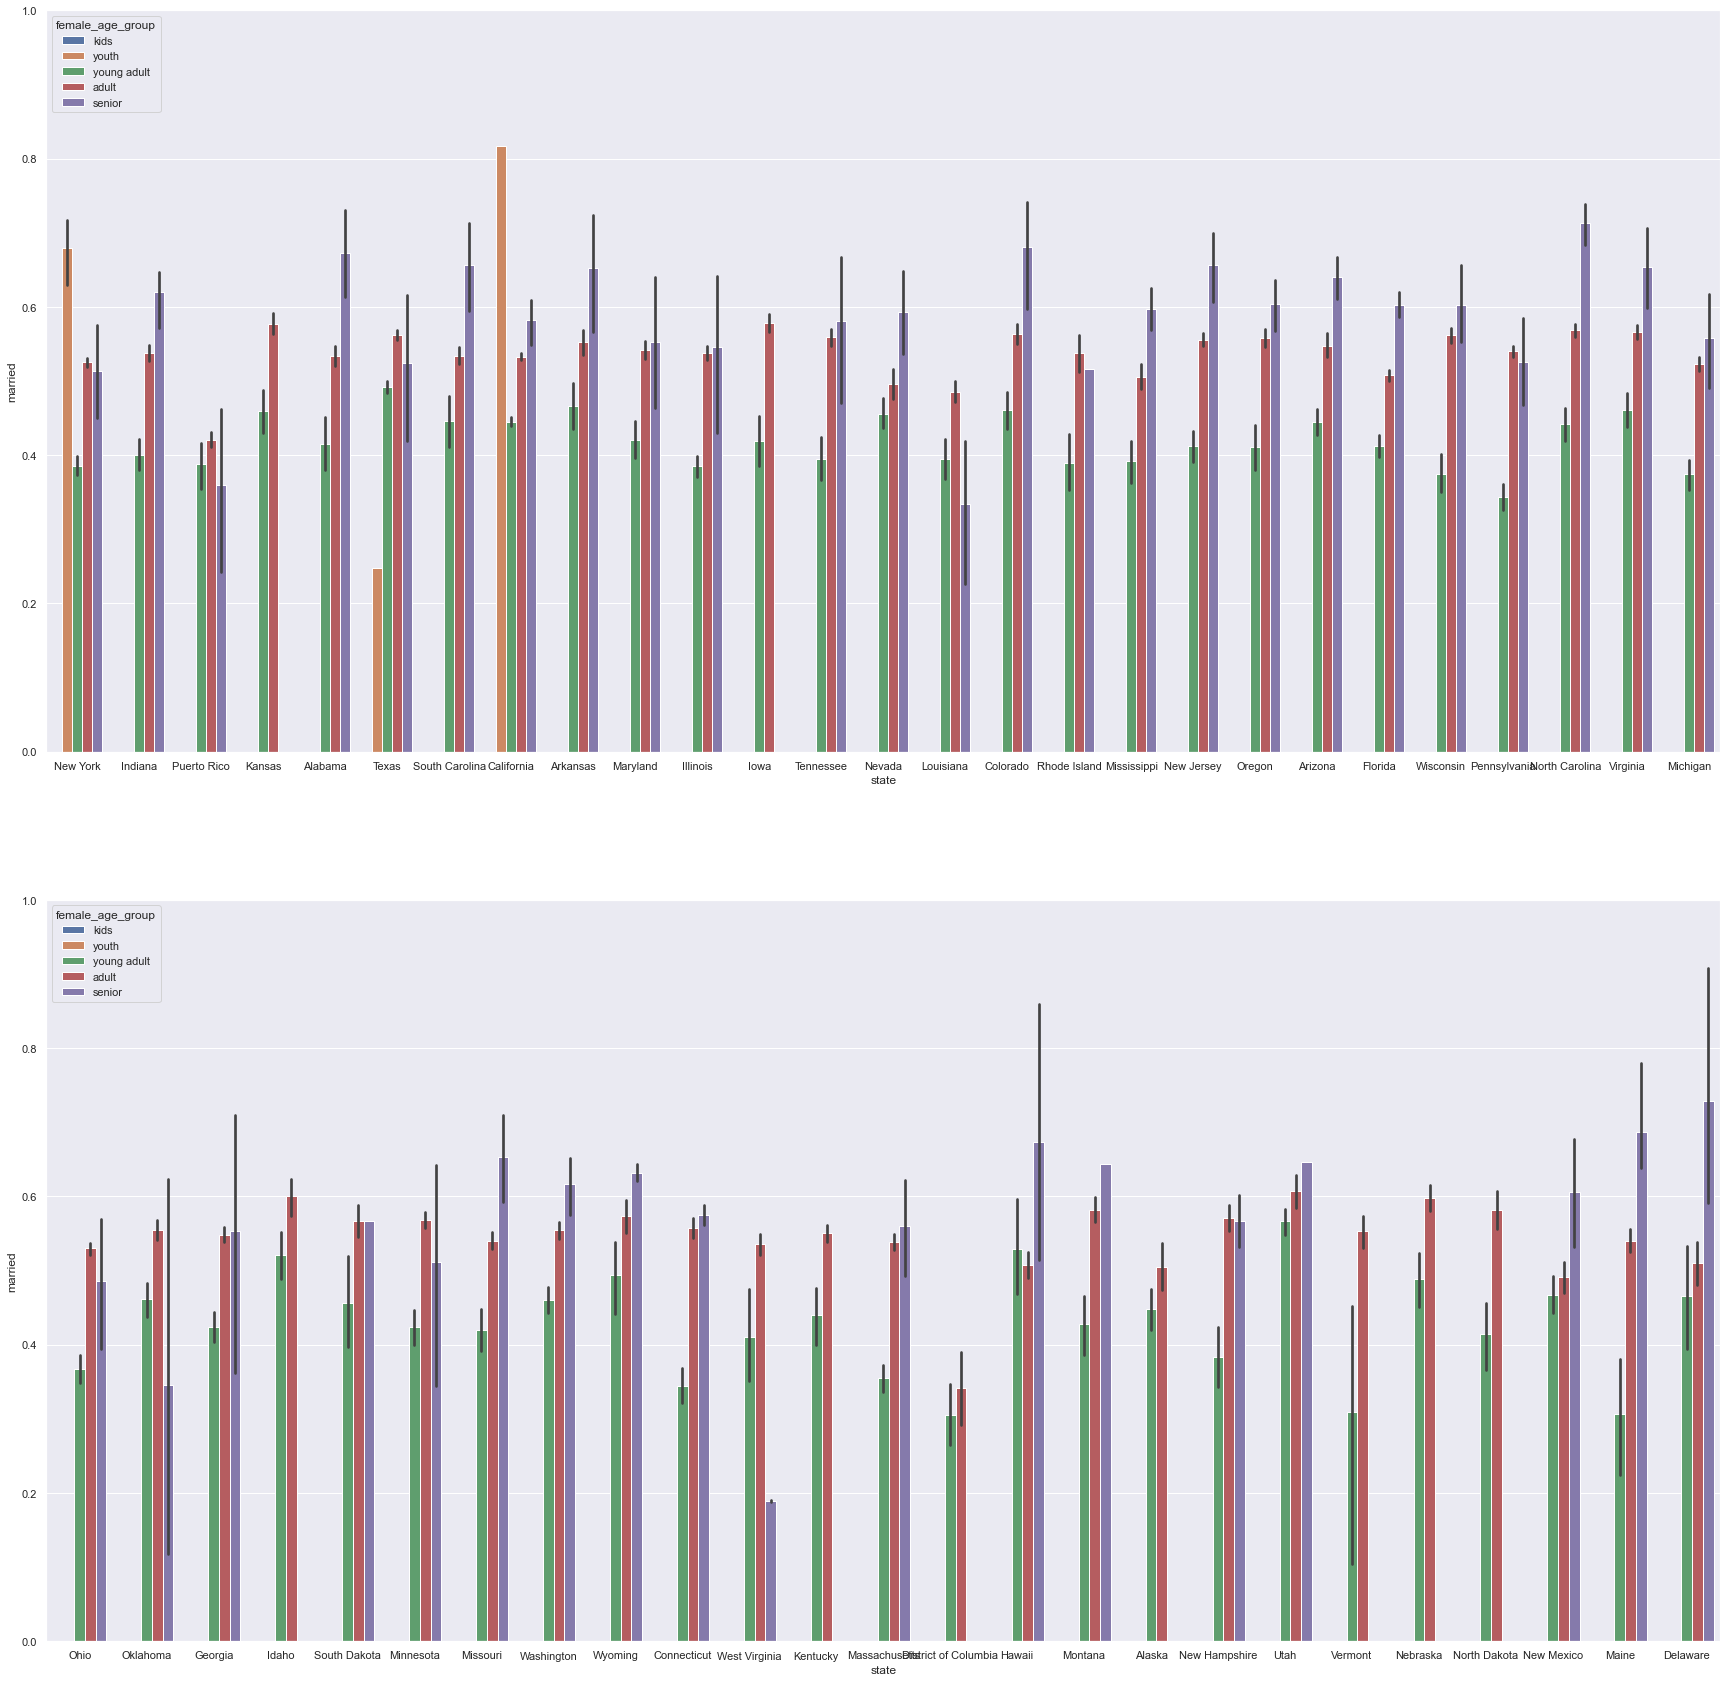

In [69]:
fig, axes = plt.subplots(2, 1, figsize = (30, 30))
sns.barplot(x = 'state', y = 'married', hue = 'female_age_group', ax = axes[0], order = data['state'].unique().to_list()[:27], data = data)
sns.barplot(x = 'state', y = 'married', hue = 'female_age_group', ax = axes[1], order = data['state'].unique().to_list()[27:], data = data)
axes[0].set_ylim((0, 1))
axes[1].set_ylim((0, 1))
plt.show()

#### We can see New York and California have high ratio married youth in female group.

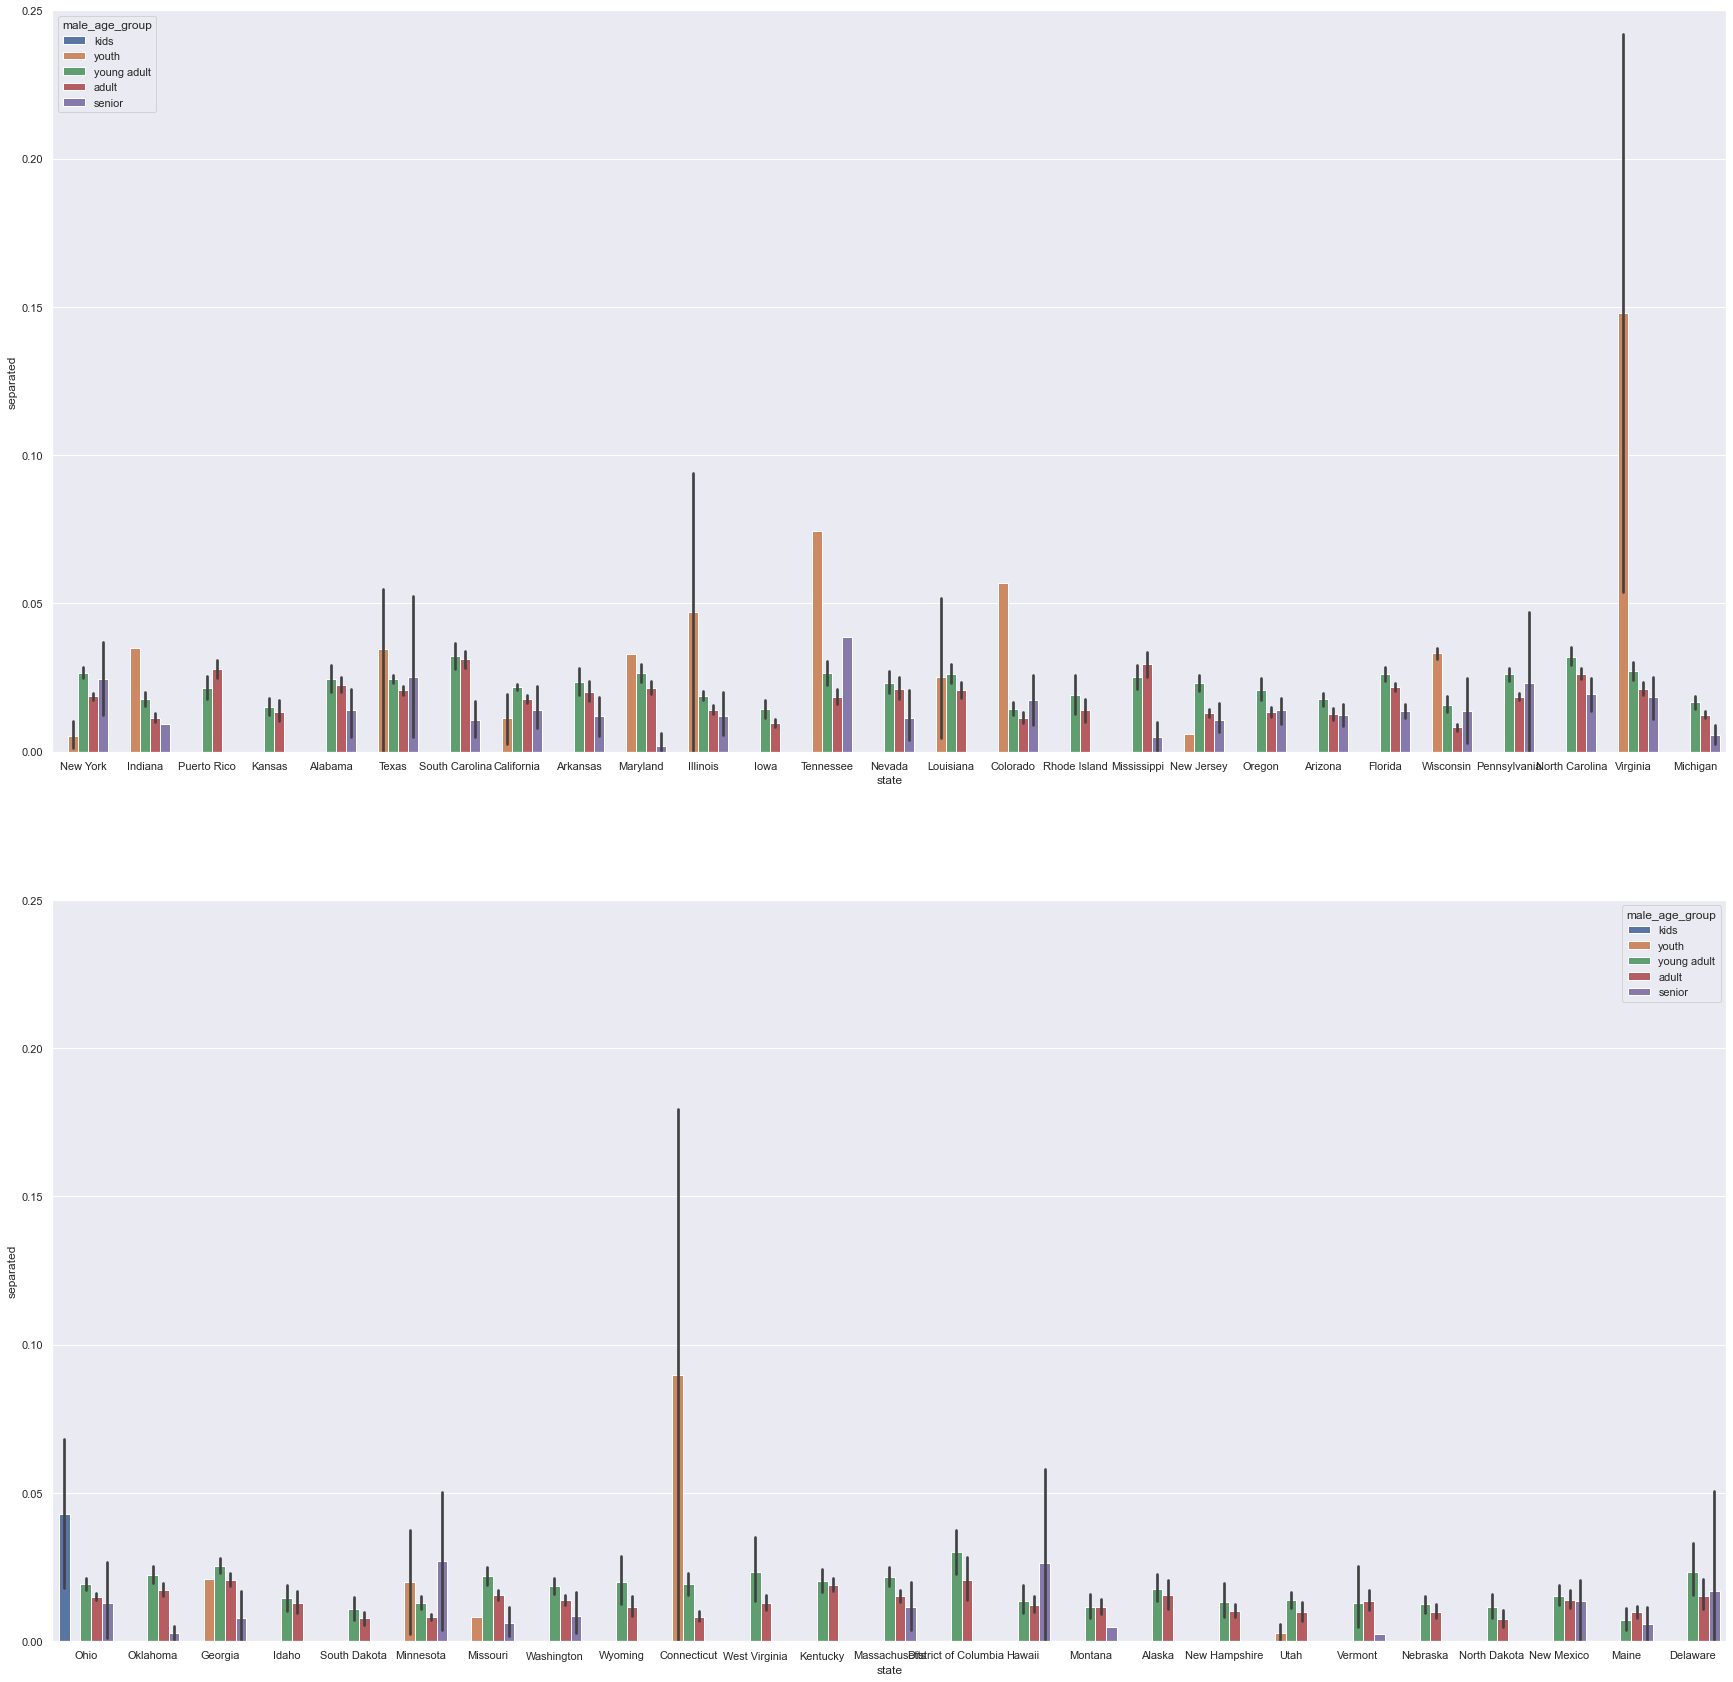

In [70]:
fig, axes = plt.subplots(2, 1, figsize = (30, 30))
sns.barplot(x = 'state', y = 'separated', hue = 'male_age_group', ax = axes[0], order = data['state'].unique().to_list()[:27], data = data)
sns.barplot(x = 'state', y = 'separated', hue = 'male_age_group', ax = axes[1], order = data['state'].unique().to_list()[27:], data = data)
axes[0].set_ylim((0, 0.25))
axes[1].set_ylim((0, 0.25))
plt.show()

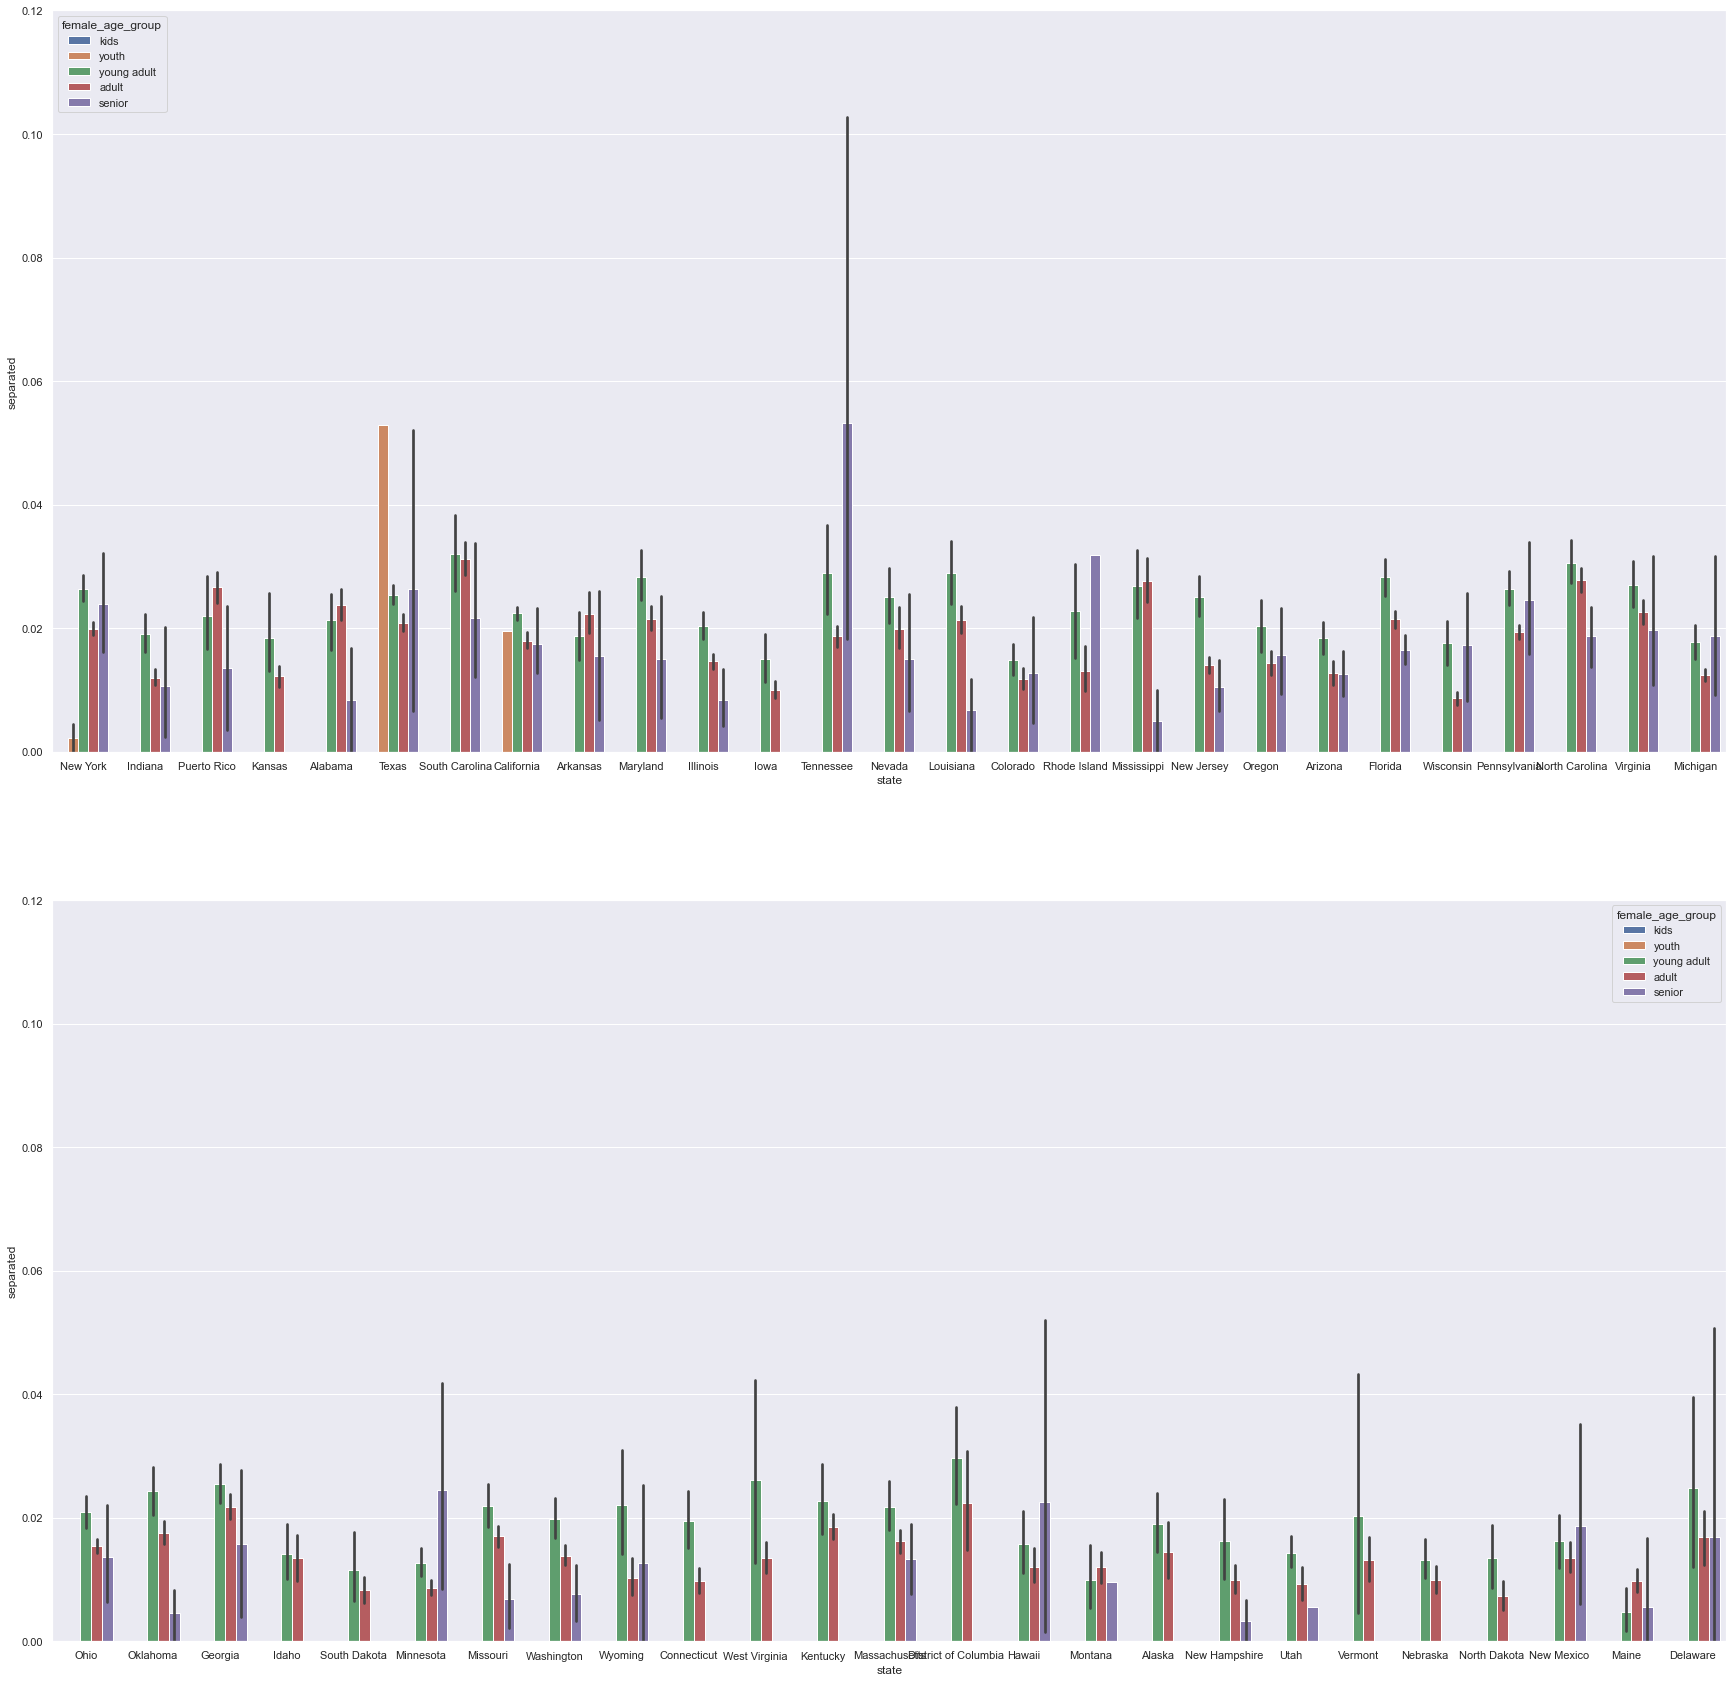

In [71]:
fig, axes = plt.subplots(2, 1, figsize = (30, 30))
sns.barplot(x = 'state', y = 'separated', hue = 'female_age_group', ax = axes[0], order = data['state'].unique().to_list()[:27], data = data)
sns.barplot(x = 'state', y = 'separated', hue = 'female_age_group', ax = axes[1], order = data['state'].unique().to_list()[27:], data = data)
axes[0].set_ylim((0, 0.12))
axes[1].set_ylim((0, 0.12))
plt.show()

#### From above analysis, we see youth and kids marriage are not stable which makes sense because of age consideration.

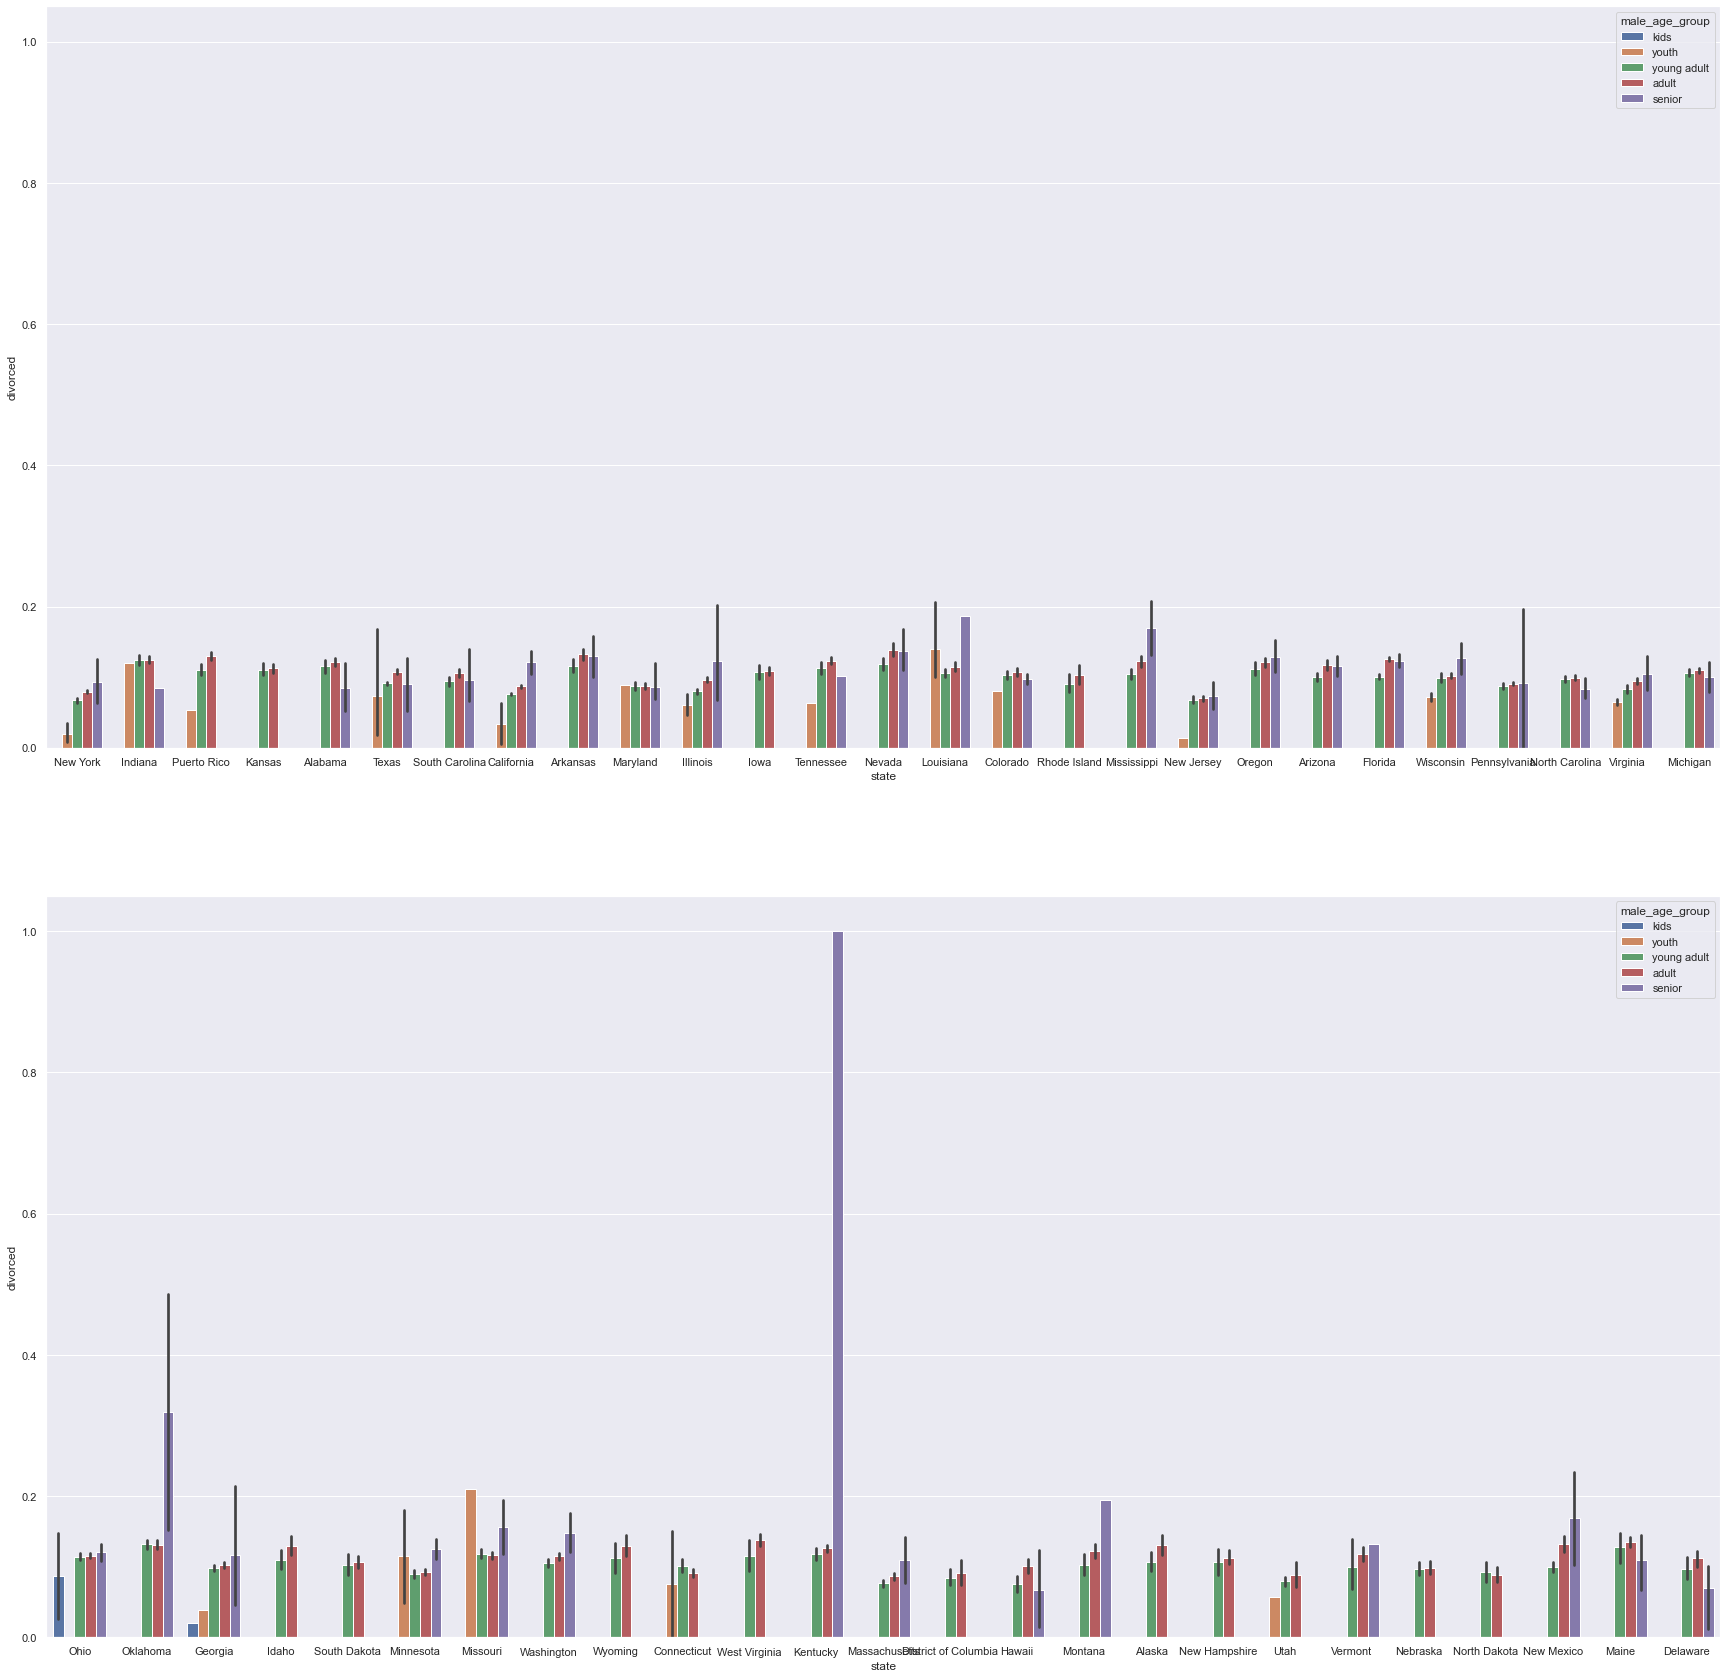

In [72]:
fig, axes = plt.subplots(2, 1, figsize = (30, 30))
sns.barplot(x = 'state', y = 'divorced', hue = 'male_age_group', ax = axes[0], order = data['state'].unique().to_list()[:27], data = data)
sns.barplot(x = 'state', y = 'divorced', hue = 'male_age_group', ax = axes[1], order = data['state'].unique().to_list()[27:], data = data)
axes[0].set_ylim((0, 1.05))
axes[1].set_ylim((0, 1.05))
plt.show()

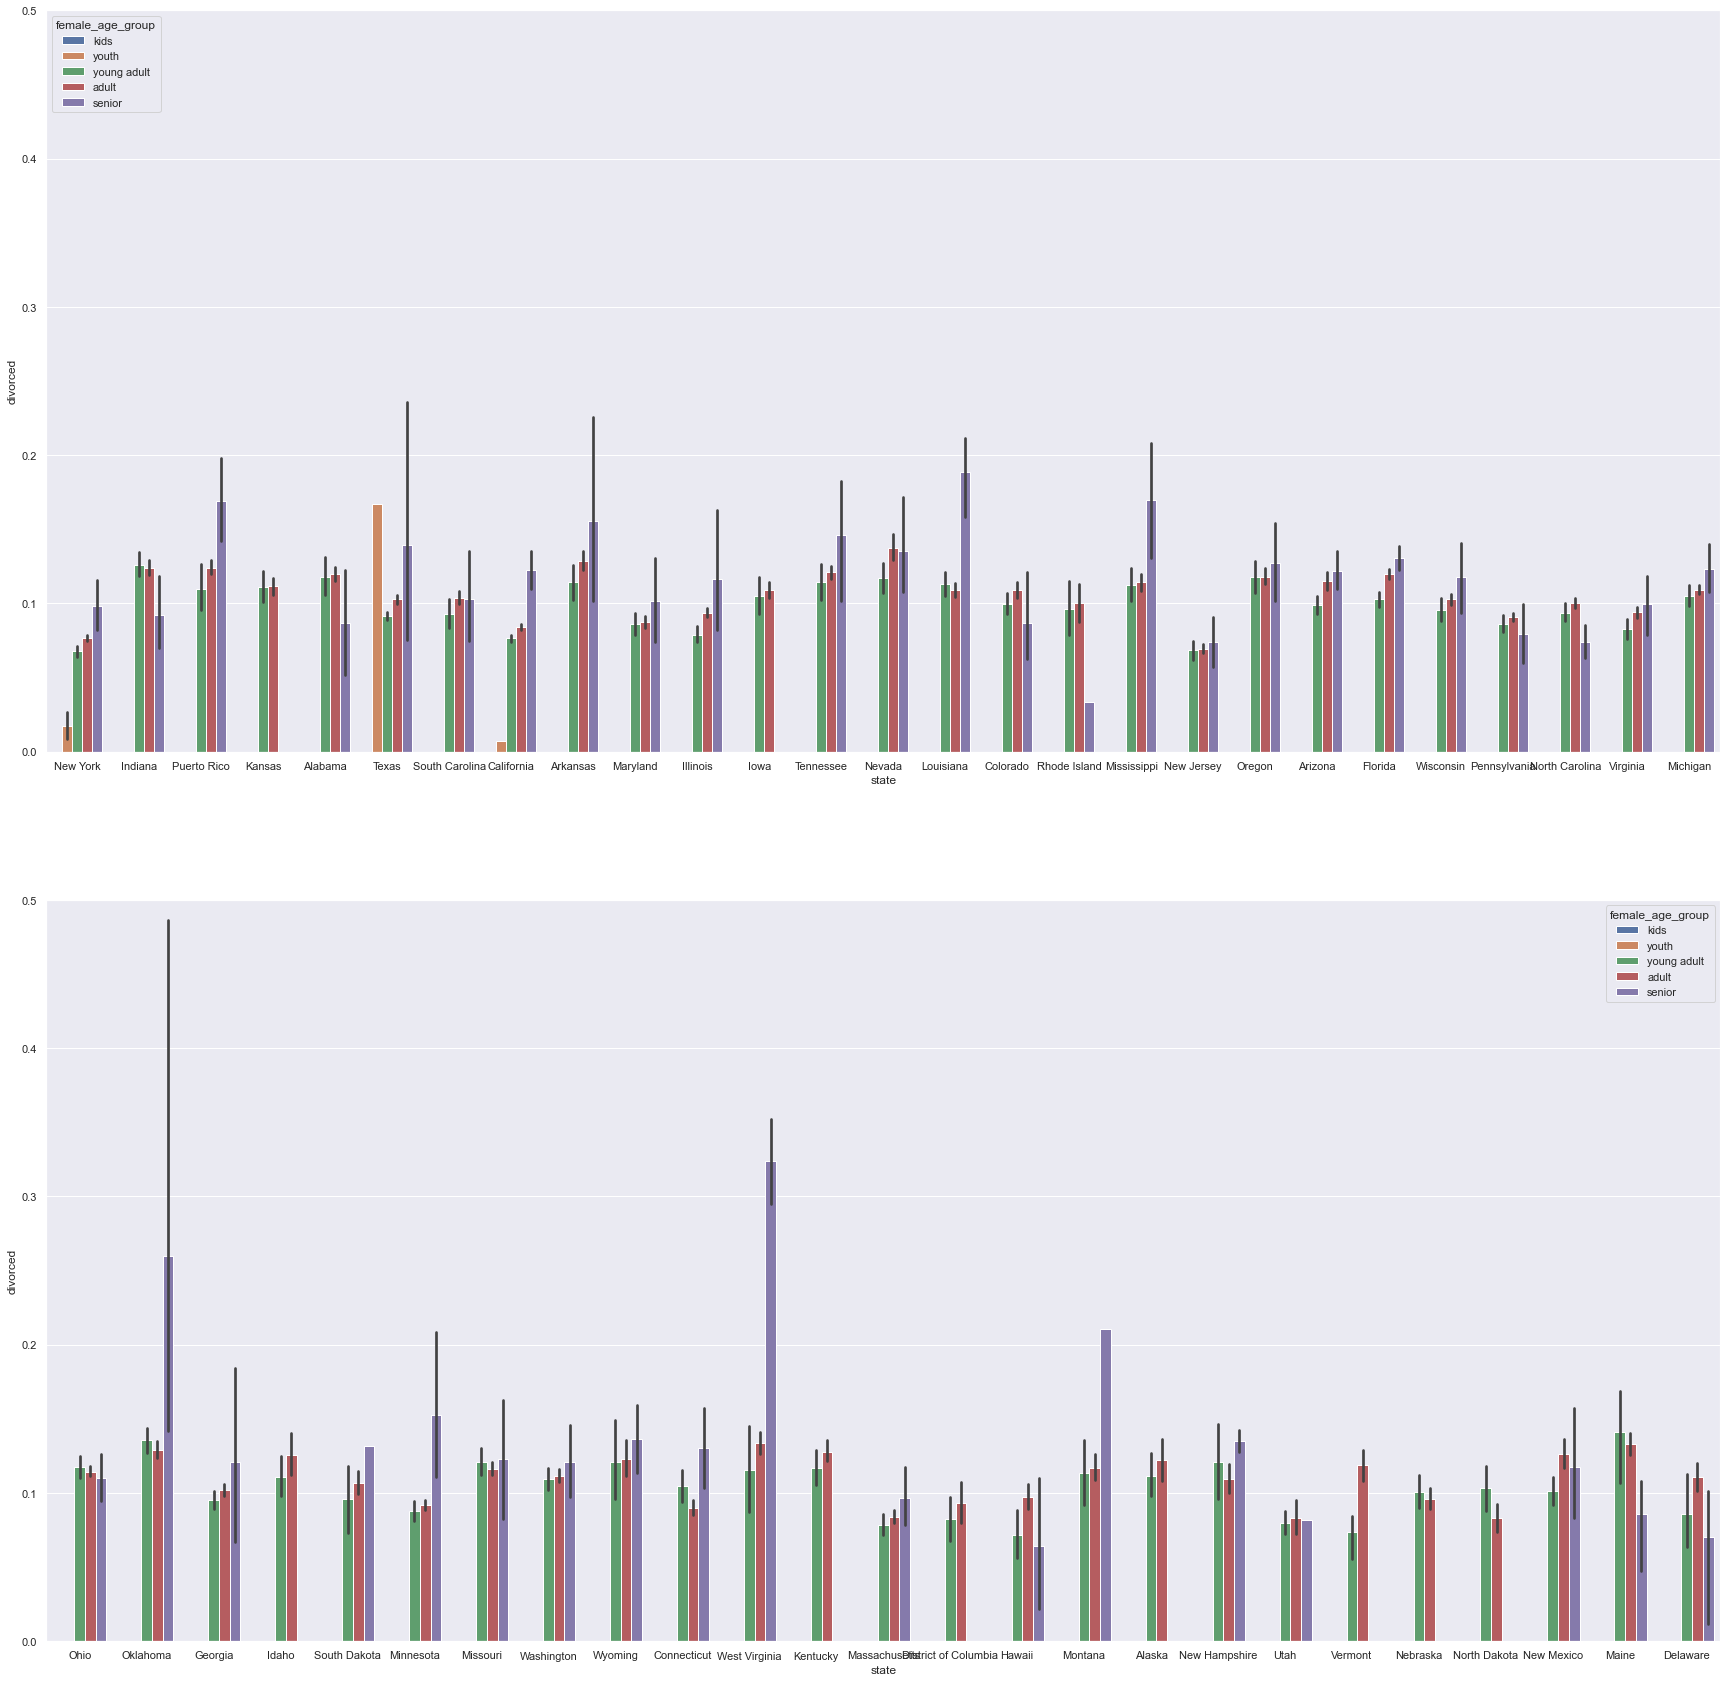

In [73]:
fig, axes = plt.subplots(2, 1, figsize = (30, 30))
sns.barplot(x = 'state', y = 'divorced', hue = 'female_age_group', ax = axes[0], order = data['state'].unique().to_list()[:27], data = data)
axes[0].set_ylim((0, 0.5))
axes[1].set_ylim((0, 0.5))
sns.barplot(x = 'state', y = 'divorced', hue = 'female_age_group', ax = axes[1], order = data['state'].unique().to_list()[27:], data = data)
plt.show()

#### Kentucky has the highest divorced rate in senior male group, West Virginia has the highest divorced rate in senior female group.

In [74]:
overall_pct_rent_income = round(data['rent_median'].sum() / data['hi_median'].sum() * 100, 2)
overall_pct_rent_income

1.75

In [75]:
data['pct_rent_income'] = data['rent_median'] / data['hi_median'] * 100

C:\Users\bnmwe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pct_rent_income', ylabel='Density'>

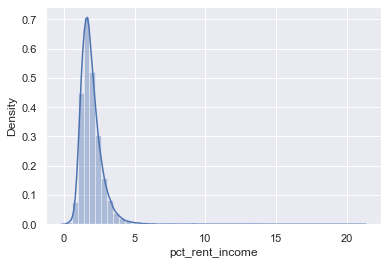

In [76]:
sns.distplot(data['pct_rent_income'])

In [77]:
data.nlargest(300, 'pct_rent_income')['state'].unique().to_list()

['Florida',
 'Arizona',
 'Virginia',
 'Illinois',
 'Georgia',
 'Texas',
 'North Carolina',
 'Louisiana',
 'Ohio',
 'California',
 'Indiana',
 'Wisconsin',
 'New York',
 'Washington',
 'Oregon',
 'Pennsylvania',
 'Michigan',
 'Tennessee',
 'Maryland',
 'Mississippi',
 'Alabama',
 'Iowa',
 'Puerto Rico',
 'New Jersey',
 'South Carolina',
 'Wyoming',
 'Hawaii',
 'Utah',
 'Missouri',
 'Connecticut',
 'Minnesota',
 'Massachusetts',
 'Colorado',
 'Kansas',
 'Oklahoma',
 'District of Columbia',
 'New Mexico']

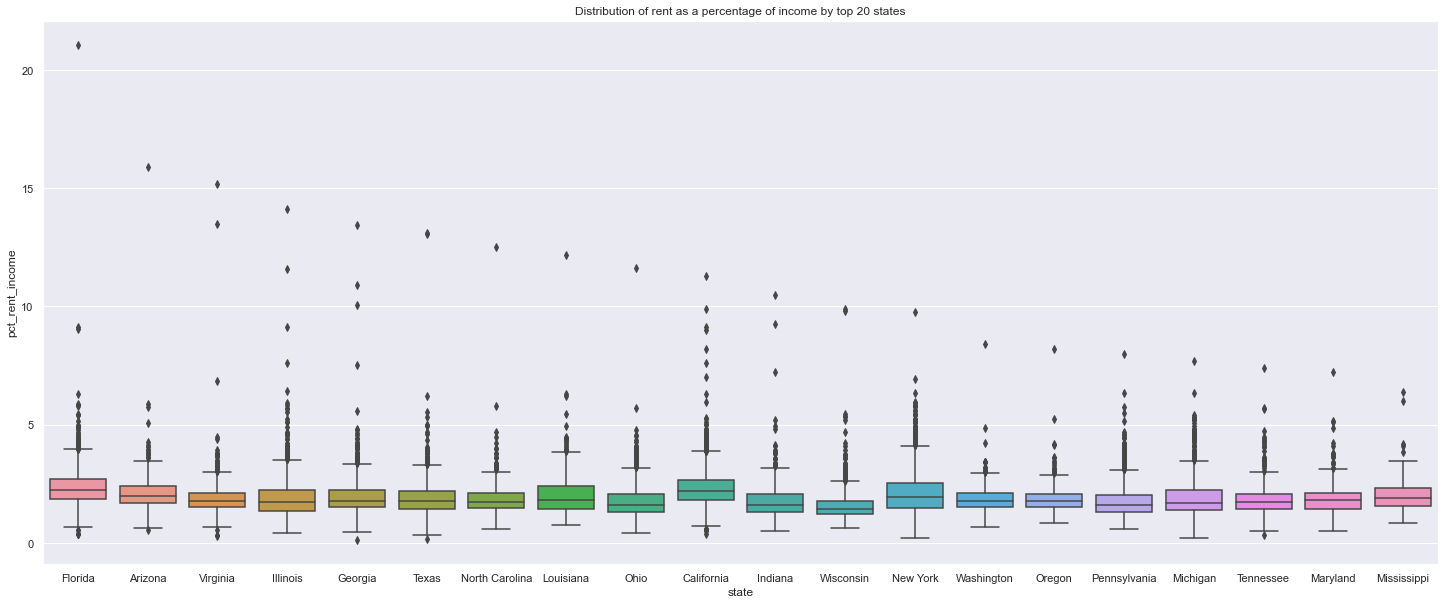

In [78]:
plt.figure(figsize = (25, 10))
sns.boxplot(x = 'state', y = 'pct_rent_income', data = data, order = ['Florida', 'Arizona', 'Virginia', 'Illinois', 'Georgia', 'Texas', 'North Carolina', 'Louisiana', 'Ohio', 'California', 'Indiana', 'Wisconsin', 'New York', 'Washington', 'Oregon', 'Pennsylvania', 'Michigan', 'Tennessee', 'Maryland', 'Mississippi'])
plt.title('Distribution of rent as a percentage of income by top 20 states')
plt.show()

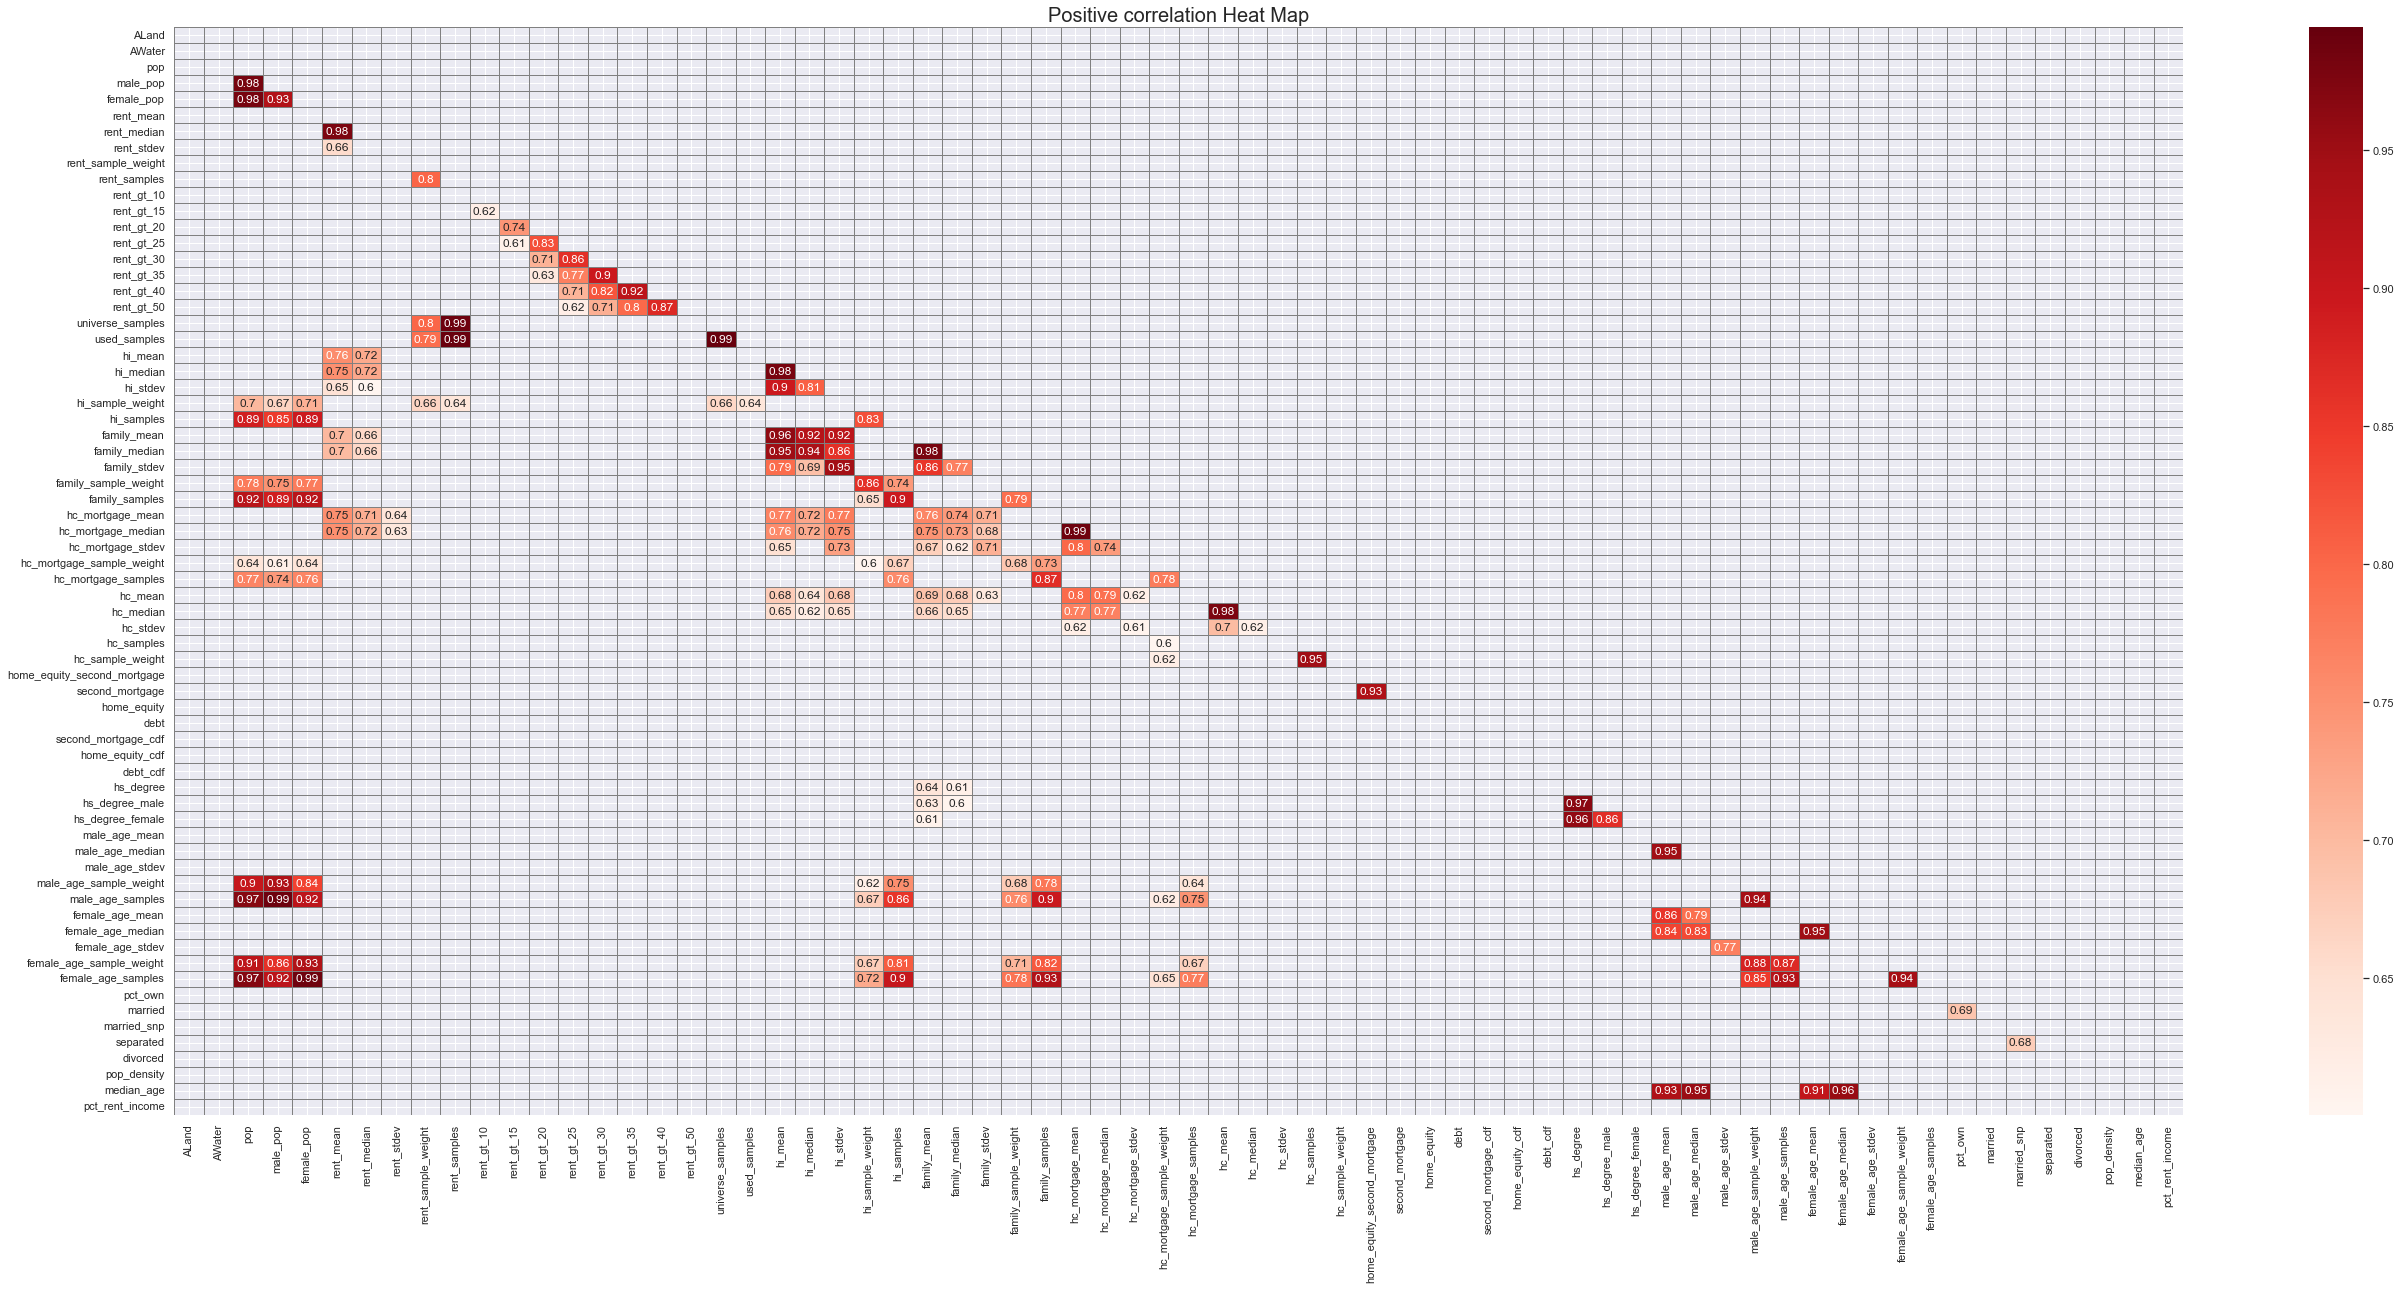

In [79]:
corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))
#mask[np.triu_indices_from(mask)] = True

high_pos = corr[corr>=.6]
plt.figure(figsize=(45,20))
sns.heatmap(high_pos, cmap="Reds", annot = True, mask = mask, linewidths=1, linecolor='gray').set_title('Positive correlation Heat Map', fontsize = 20)
plt.grid('on', )
plt.show()

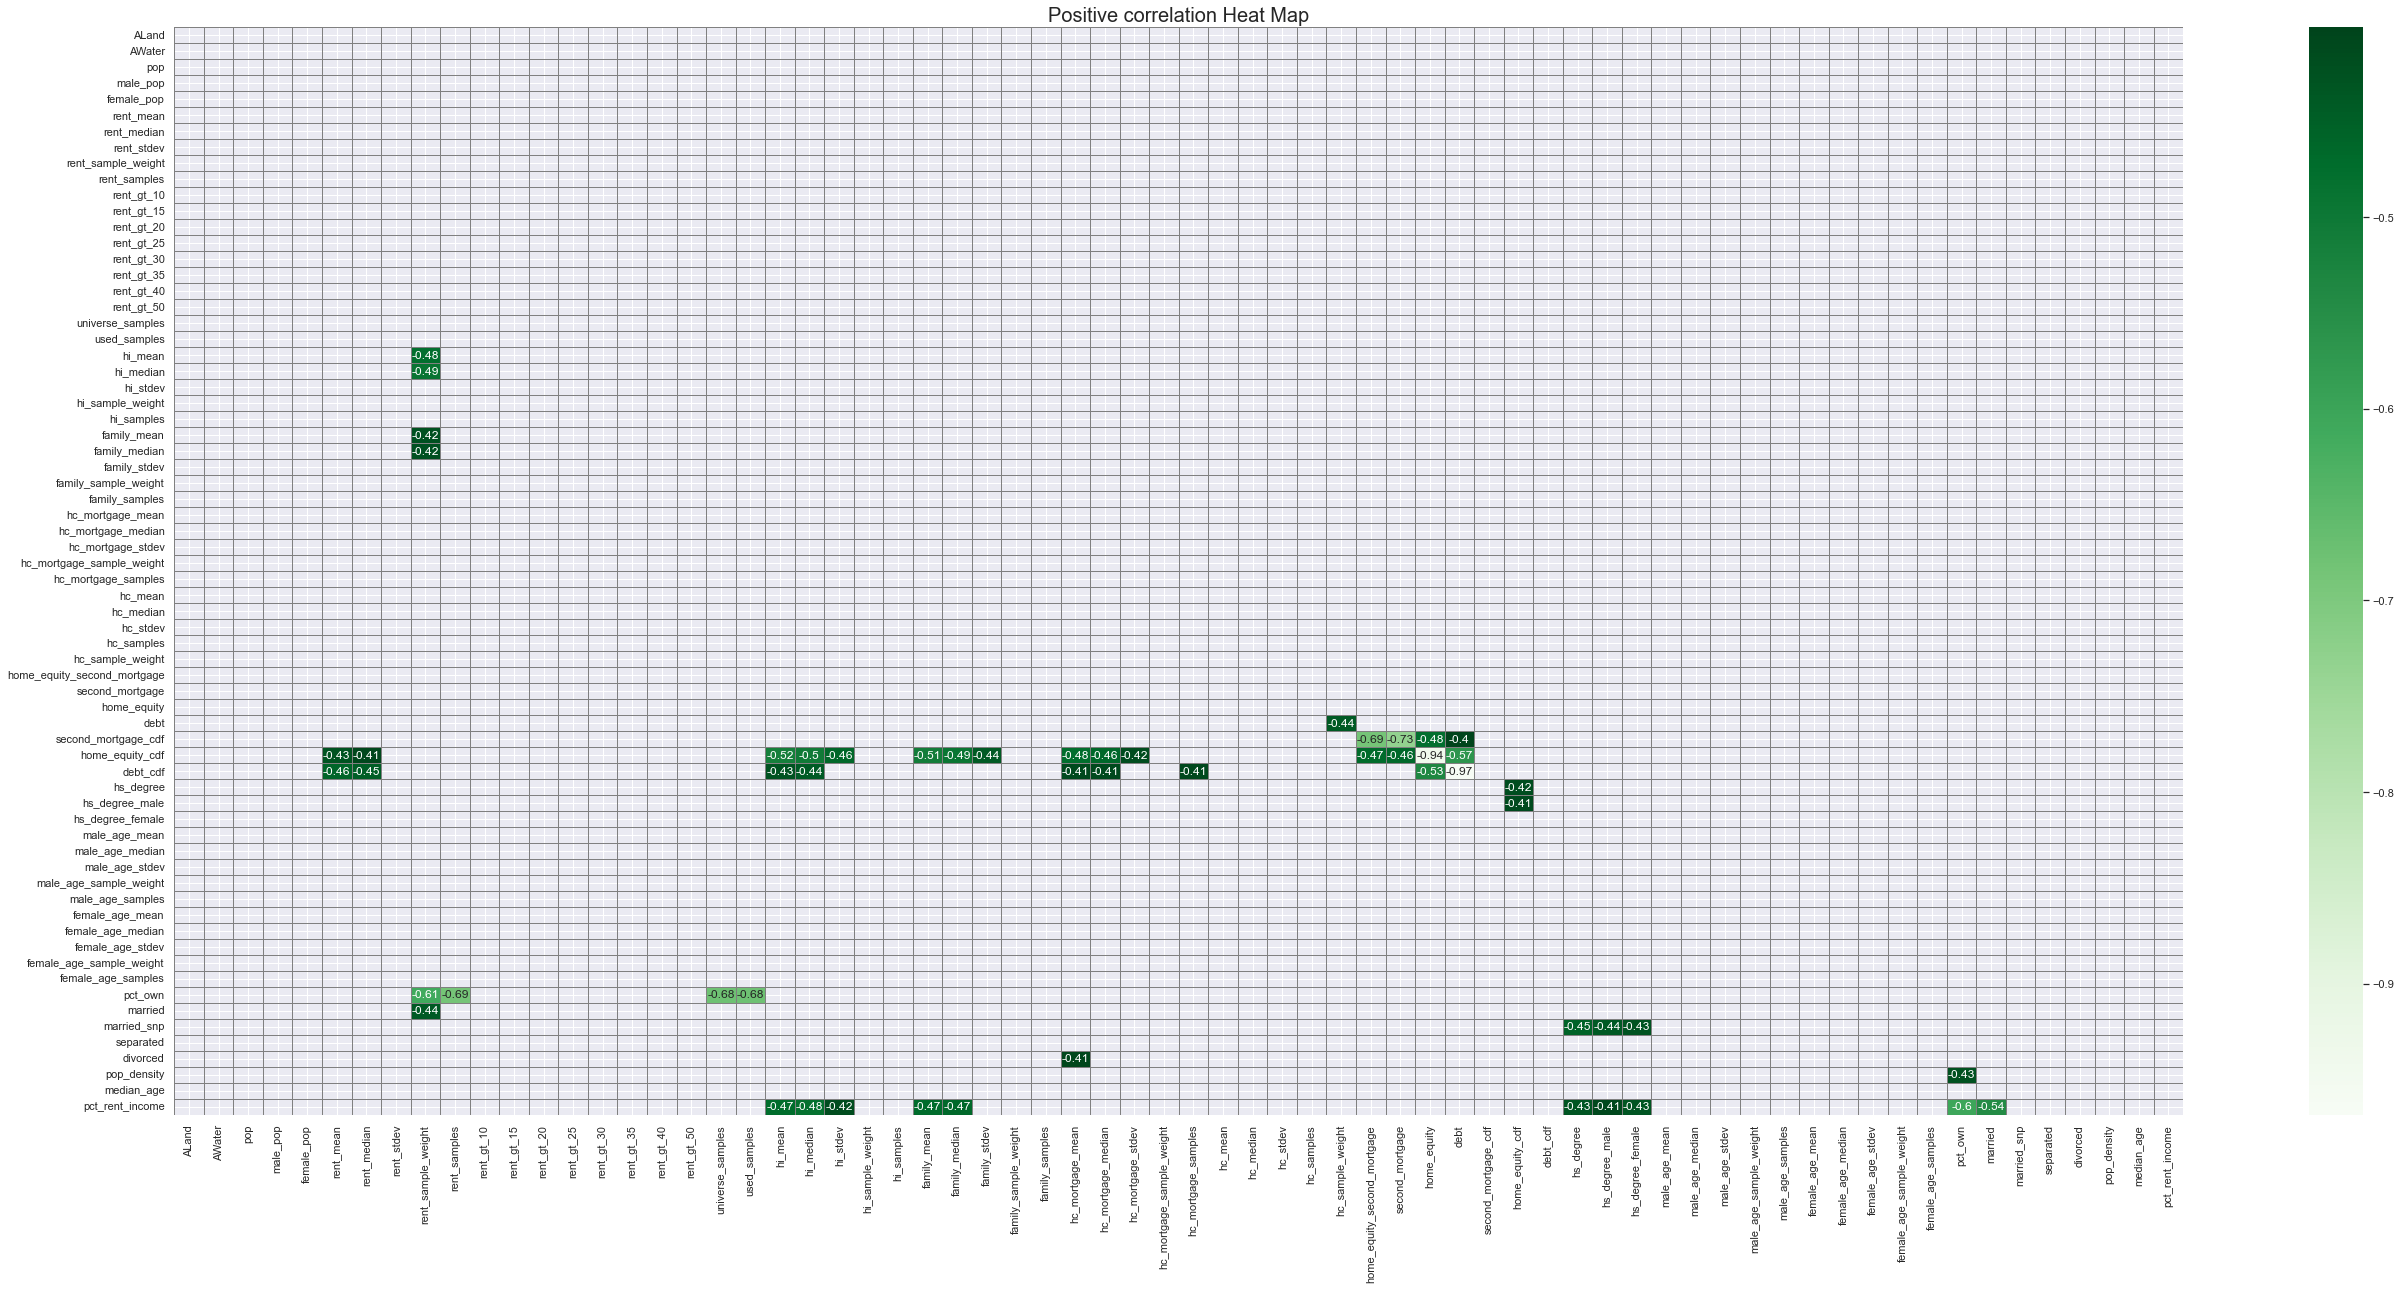

In [80]:
high_neg = corr[corr<=-.4]
plt.figure(figsize=(45,20))
sns.heatmap(high_neg, cmap="Greens", annot = True, mask = mask, linewidths=1, linecolor='gray').set_title('Positive correlation Heat Map', fontsize = 20)
plt.grid('on', )
plt.show()

#### Project Task: Week 3
##### Data Pre-processing:

  1. The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 
  2. Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data. Following are the list of latent variables:

    • Highschool graduation rates

    • Median population age

    • Second mortgage statistics

    • Percent own

    • Bad debt expense

## Factor Analysis(FA)

In [81]:
df.head()

UID COUNTYID STATEID        state state_ab        city           place  \
0  267822       53      36     New York       NY    Hamilton        Hamilton   
1  246444      141      18      Indiana       IN  South Bend        Roseland   
2  245683       63      18      Indiana       IN    Danville        Danville   
3  279653      127      72  Puerto Rico       PR    San Juan        Guaynabo   
4  247218      161      20       Kansas       KS   Manhattan  Manhattan City   

    type zip_code area_code        lat        lng        ALand   AWater   pop  \
0   City    13346       315  42.840812 -75.501524  202183361.0  1699120  5230   
1   City    46616       574  41.701441 -86.266614    1560828.0   100363  2633   
2   City    46122       317  39.792202 -86.515246   69561595.0   284193  6881   
3  Urban      927       787  18.396103 -66.104169    1105793.0        0  2700   
4   City    66502       785  39.195573 -96.569366    2554403.0        0  5637   

   male_pop  female_pop  rent_mean  rent_median  rent_stdev  \
0      2612        2618  769.38638        784.0   232.63967   
1      1349        1284  804.87924        848.0   253.46747   
2      3643        3238  742.77365        703.0   323.39011   
3      1141        1559  803.42018        782.0   297.39258   
4      2586        3051  938.56493        881.0   392.44096   

   rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  rent_gt_20  \
0           272.34441         362.0     0.86761     0.79155     0.59155   
1           312.58622         513.0     0.97410     0.93227     0.69920   
2           291.85520         378.0     0.95238     0.88624     0.79630   
3           259.30316         368.0     0.94693     0.87151     0.69832   
4          1005.42886        1704.0     0.99286     0.98247     0.91688   

   rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  \
0     0.45634     0.42817     0.18592     0.15493     0.12958   
1     0.69920     0.55179     0.41235     0.39044     0.27888   
2     0.66667     0.39153     0.39153     0.28307     0.15873   
3     0.61732     0.51397     0.46927     0.35754     0.32961   
4     0.84740     0.78247     0.60974     0.55455     0.44416   

   universe_samples  used_samples      hi_mean  hi_median     hi_stdev  \
0               387           355  63125.28406    48120.0  49042.01206   
1               542           502  41931.92593    35186.0  31639.50203   
2               459           378  84942.68317    74964.0  56811.62186   
3               438           358  48733.67116    37845.0  45100.54010   
4              1725          1540  31834.15466    22497.0  34046.50907   

   hi_sample_weight  hi_samples  family_mean  family_median  family_stdev  \
0        1290.96240      2024.0  67994.14790        53245.0   47667.30119   
1         838.74664      1127.0  50670.10337        43023.0   34715.57548   
2        1155.20980      2488.0  95262.51431        85395.0   49292.67664   
3         928.32193      1267.0  56401.68133        44399.0   41082.90515   
4        1548.67477      1983.0  54053.42396        50272.0   39609.12605   

   family_sample_weight  family_samples  hc_mortgage_mean  hc_mortgage_median  \
0             884.33516          1491.0        1414.80295              1223.0   
1             375.28798           554.0         864.41390               784.0   
2             709.74925          1889.0        1506.06758              1361.0   
3             490.18479           729.0        1175.28642              1101.0   
4             244.08903           395.0        1192.58759              1125.0   

   hc_mortgage_stdev  hc_mortgage_sample_weight  hc_mortgage_samples  \
0          641.22898                  377.83135                867.0   
1          482.27020                  316.88320                356.0   
2          731.89394                  699.41354               1491.0   
3          428.98751                  261.28471                437.0   
4          327.49674                   76.61052               

In [82]:
df.shape

(27161, 77)

In [83]:
df['bad_debt'] = df['second_mortgage'] + df['home_equity'] - df['home_equity_second_mortgage']

In [84]:
cat_col_df = df.select_dtypes(include = 'category')
cat_col_df.head()

UID COUNTYID STATEID        state state_ab        city           place  \
0  267822       53      36     New York       NY    Hamilton        Hamilton   
1  246444      141      18      Indiana       IN  South Bend        Roseland   
2  245683       63      18      Indiana       IN    Danville        Danville   
3  279653      127      72  Puerto Rico       PR    San Juan        Guaynabo   
4  247218      161      20       Kansas       KS   Manhattan  Manhattan City   

    type zip_code area_code        lat        lng  
0   City    13346       315  42.840812 -75.501524  
1   City    46616       574  41.701441 -86.266614  
2   City    46122       317  39.792202 -86.515246  
3  Urban      927       787  18.396103 -66.104169  
4   City    66502       785  39.195573 -96.569366

In [85]:
num_col_df = df.select_dtypes(include = [np.number])
num_col_df.head()

ALand   AWater   pop  male_pop  female_pop  rent_mean  rent_median  \
0  202183361.0  1699120  5230      2612        2618  769.38638        784.0   
1    1560828.0   100363  2633      1349        1284  804.87924        848.0   
2   69561595.0   284193  6881      3643        3238  742.77365        703.0   
3    1105793.0        0  2700      1141        1559  803.42018        782.0   
4    2554403.0        0  5637      2586        3051  938.56493        881.0   

   rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  \
0   232.63967           272.34441         362.0     0.86761     0.79155   
1   253.46747           312.58622         513.0     0.97410     0.93227   
2   323.39011           291.85520         378.0     0.95238     0.88624   
3   297.39258           259.30316         368.0     0.94693     0.87151   
4   392.44096          1005.42886        1704.0     0.99286     0.98247   

   rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  \
0     0.59155     0.45634     0.42817     0.18592     0.15493     0.12958   
1     0.69920     0.69920     0.55179     0.41235     0.39044     0.27888   
2     0.79630     0.66667     0.39153     0.39153     0.28307     0.15873   
3     0.69832     0.61732     0.51397     0.46927     0.35754     0.32961   
4     0.91688     0.84740     0.78247     0.60974     0.55455     0.44416   

   universe_samples  used_samples      hi_mean  hi_median     hi_stdev  \
0               387           355  63125.28406    48120.0  49042.01206   
1               542           502  41931.92593    35186.0  31639.50203   
2               459           378  84942.68317    74964.0  56811.62186   
3               438           358  48733.67116    37845.0  45100.54010   
4              1725          1540  31834.15466    22497.0  34046.50907   

   hi_sample_weight  hi_samples  family_mean  family_median  family_stdev  \
0        1290.96240      2024.0  67994.14790        53245.0   47667.30119   
1         838.74664      1127.0  50670.10337        43023.0   34715.57548   
2        1155.20980      2488.0  95262.51431        85395.0   49292.67664   
3         928.32193      1267.0  56401.68133        44399.0   41082.90515   
4        1548.67477      1983.0  54053.42396        50272.0   39609.12605   

   family_sample_weight  family_samples  hc_mortgage_mean  hc_mortgage_median  \
0             884.33516          1491.0        1414.80295              1223.0   
1             375.28798           554.0         864.41390               784.0   
2             709.74925          1889.0        1506.06758              1361.0   
3             490.18479           729.0        1175.28642              1101.0   
4             244.08903           395.0        1192.58759              1125.0   

   hc_mortgage_stdev  hc_mortgage_sample_weight  hc_mortgage_samples  \
0          641.22898                  377.83135                867.0   
1          482.27020                  316.88320                356.0   
2          731.89394                  699.41354               1491.0   
3          428.98751                  261.28471                437.0   
4          327.49674                   76.61052                134.0   

     hc_mean  hc_median   hc_stdev  hc_samples  hc_sample_weight  \
0  570.01530      558.0  270.11299       770.0         499.29293   
1  351.98293      336.0  125.40457       229.0         189.60606   
2  556.45986      532.0  184.42175       538.0         323.35354   
3  288.04047      247.0  185.55887       392.0         314.90566   
4  443.68855      444.0   76.12674       124.0          79.55556   

   home_equity_second_mortgage  second_mortgage  home_equity     debt  \
0                      0.01588          0.02077      0.08919  0.52963   
1                      0.02222          0.02222      0.04274  0.60855   
2                      0.00000          0.00000      0.09512  0.73484   
3                      0.01086          0.01086      0.01086  0.52714   
4                 

In [86]:
#drop unnecessary columns
fa_df = num_col_df.drop(['ALand', 'AWater'], axis = 1)

In [87]:
fa_df.head()

pop  male_pop  female_pop  rent_mean  rent_median  rent_stdev  \
0  5230      2612        2618  769.38638        784.0   232.63967   
1  2633      1349        1284  804.87924        848.0   253.46747   
2  6881      3643        3238  742.77365        703.0   323.39011   
3  2700      1141        1559  803.42018        782.0   297.39258   
4  5637      2586        3051  938.56493        881.0   392.44096   

   rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  rent_gt_20  \
0           272.34441         362.0     0.86761     0.79155     0.59155   
1           312.58622         513.0     0.97410     0.93227     0.69920   
2           291.85520         378.0     0.95238     0.88624     0.79630   
3           259.30316         368.0     0.94693     0.87151     0.69832   
4          1005.42886        1704.0     0.99286     0.98247     0.91688   

   rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  \
0     0.45634     0.42817     0.18592     0.15493     0.12958   
1     0.69920     0.55179     0.41235     0.39044     0.27888   
2     0.66667     0.39153     0.39153     0.28307     0.15873   
3     0.61732     0.51397     0.46927     0.35754     0.32961   
4     0.84740     0.78247     0.60974     0.55455     0.44416   

   universe_samples  used_samples      hi_mean  hi_median     hi_stdev  \
0               387           355  63125.28406    48120.0  49042.01206   
1               542           502  41931.92593    35186.0  31639.50203   
2               459           378  84942.68317    74964.0  56811.62186   
3               438           358  48733.67116    37845.0  45100.54010   
4              1725          1540  31834.15466    22497.0  34046.50907   

   hi_sample_weight  hi_samples  family_mean  family_median  family_stdev  \
0        1290.96240      2024.0  67994.14790        53245.0   47667.30119   
1         838.74664      1127.0  50670.10337        43023.0   34715.57548   
2        1155.20980      2488.0  95262.51431        85395.0   49292.67664   
3         928.32193      1267.0  56401.68133        44399.0   41082.90515   
4        1548.67477      1983.0  54053.42396        50272.0   39609.12605   

   family_sample_weight  family_samples  hc_mortgage_mean  hc_mortgage_median  \
0             884.33516          1491.0        1414.80295              1223.0   
1             375.28798           554.0         864.41390               784.0   
2             709.74925          1889.0        1506.06758              1361.0   
3             490.18479           729.0        1175.28642              1101.0   
4             244.08903           395.0        1192.58759              1125.0   

   hc_mortgage_stdev  hc_mortgage_sample_weight  hc_mortgage_samples  \
0          641.22898                  377.83135                867.0   
1          482.27020                  316.88320                356.0   
2          731.89394                  699.41354               1491.0   
3          428.98751                  261.28471                437.0   
4          327.49674                   76.61052                134.0   

     hc_mean  hc_median   hc_stdev  hc_samples  hc_sample_weight  \
0  570.01530      558.0  270.11299       770.0         499.29293   
1  351.98293      336.0  125.40457       229.0         189.60606   
2  556.45986      532.0  184.42175       538.0         323.35354   
3  288.04047      247.0  185.55887       392.0         314.90566   
4  443.68855      444.0   76.12674       124.0          79.55556   

   home_equity_second_mortgage  second_mortgage  home_equity     debt  \
0                      0.01588          0.02077      0.08919  0.52963   
1                      0.02222          0.02222      0.04274  0.60855   
2                      0.00000          0.00000      0.09512  0.73484   
3                      0.01086          0.01086      0.01086  0.52714   
4                      0.05426          0.05426      0.05426  0.51938   

   second_mortgage_cdf  home_equity_cdf  debt_cdf  hs_degree  hs_degree

#### KAISER-MEYER-OLKIN (KMO) TEST
KMO Test measures the proportion of variance that might be a common variance among the variables. Larger proportions are expected as it represents more correlation is present among the variables thereby giving way for the application of dimensionality reduction techniques such as Factor Analysis. KMO score is always between 0 to 1 and values more than 0.6 are much appreciated. We can also say it as a measure of how suited our data is for factor analysis.

In [88]:
!pip install factor_analyzer

In [89]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

In [90]:
kmo_vars, kmo_model = calculate_kmo(fa_df)
print(kmo_model)
#The function will return the proportion of variance for each variable which is stored in the variable ‘kmo_vars’ and the proportion of variance for the whole of our data is stored in ‘kmo_model’. we can see that our data has an overall proportion of variance of 0.84. It shows that our data has more correlation and dimensionality reduction techniques such as the factor analysis can be applied.

0.8598164627337129


In [91]:
fa = FactorAnalyzer(rotation = None, n_factors = fa_df.shape[1])
fa.fit(fa_df)
ev, v = fa.get_eigenvalues()
ev

array([ 1.54646430e+01,  1.19628025e+01,  8.11655446e+00,  4.55852633e+00,
        3.92329381e+00,  3.03869615e+00,  2.12967914e+00,  1.44742852e+00,
        1.34104793e+00,  1.14054716e+00,  9.76697865e-01,  9.45565634e-01,
        8.33527084e-01,  7.49682031e-01,  6.57893313e-01,  5.70974513e-01,
        5.27290475e-01,  4.93485287e-01,  4.65319018e-01,  3.94387874e-01,
        3.68130677e-01,  3.20795976e-01,  3.16477306e-01,  3.05096573e-01,
        2.59947083e-01,  2.46671470e-01,  2.34297333e-01,  2.02399174e-01,
        1.94813362e-01,  1.91150306e-01,  1.70966576e-01,  1.64202591e-01,
        1.36347034e-01,  1.31869037e-01,  1.21982763e-01,  1.13647346e-01,
        1.00672639e-01,  9.30471315e-02,  8.98301633e-02,  6.55977473e-02,
        5.77198178e-02,  5.60215978e-02,  4.71935478e-02,  4.60321356e-02,
        3.27805811e-02,  2.85556866e-02,  2.45877931e-02,  2.08829257e-02,
        1.81621937e-02,  1.63250214e-02,  1.55848505e-02,  1.45514575e-02,
        1.38409722e-02,  

C:\Users\bnmwe\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


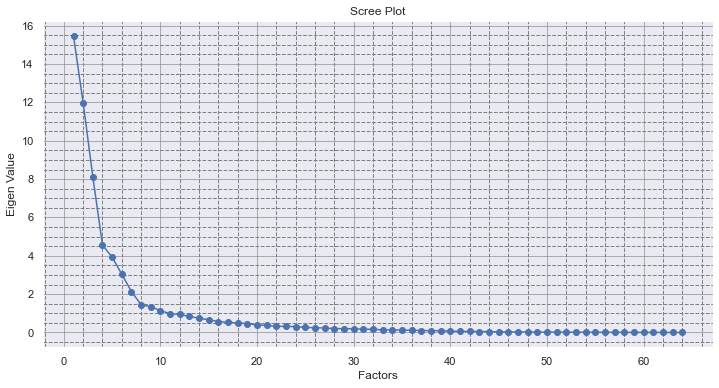

In [92]:
plt.figure(figsize = (12, 6))
plt.scatter(range(1,fa_df.shape[1]+1),ev)
plt.plot(range(1,fa_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid(color = 'gray', alpha = 0.6)
plt.grid(b=True, which='minor', color='gray', linestyle='--')
plt.minorticks_on()
plt.show()


#### From the graph, we can see that the eigenvalues drop below 1 from the 11th factor. So, the optimal number of factors is 10.

In [93]:
fa = FactorAnalyzer(10, rotation='varimax')

In [94]:
fa.fit(fa_df)
factor = pd.DataFrame(fa.loadings_, index = fa_df.columns)
factor = factor.add_prefix('Factor ')
factor

Factor 0  Factor 1  Factor 2  Factor 3  Factor 4  \
pop                          0.120221  0.965531  0.000068  0.117621 -0.102599   
male_pop                     0.117985  0.940060 -0.019025  0.094676 -0.102985   
female_pop                   0.117027  0.949231  0.019170  0.137017 -0.097812   
rent_mean                    0.804715  0.070480  0.085313 -0.116621 -0.024511   
rent_median                  0.759348  0.068810  0.080414 -0.125069 -0.037602   
rent_stdev                   0.668286  0.032803  0.081195  0.046967  0.041546   
rent_sample_weight          -0.316512  0.200988  0.048874  0.785049 -0.114070   
rent_samples                 0.021795  0.291526  0.077052  0.918646 -0.142003   
rent_gt_10                  -0.029880  0.055987  0.408910  0.044612  0.007753   
rent_gt_15                  -0.015727  0.043226  0.631834  0.074783  0.008820   
rent_gt_20                  -0.040672  0.006892  0.781404  0.089817  0.004420   
rent_gt_25                  -0.056958 -0.011764  0.867975  0.079870 -0.022536   
rent_gt_30                  -0.062564 -0.017874  0.909441  0.048826 -0.056393   
rent_gt_35                  -0.048513 -0.025586  0.909963  0.028570 -0.082222   
rent_gt_40                  -0.046539 -0.033551  0.876860  0.024768 -0.095688   
rent_gt_50                  -0.036320 -0.052313  0.774351  0.034137 -0.099183   
universe_samples             0.002819  0.315907  0.074571  0.913996 -0.132004   
used_samples                 0.027062  0.299036  0.071559  0.917385 -0.140490   
hi_mean                      0.842653  0.108388 -0.228034 -0.269861  0.030739   
hi_median                    0.790422  0.120725 -0.242568 -0.310502  0.003086   
hi_stdev                     0.847447  0.058762 -0.140203 -0.109576  0.101638   
hi_sample_weight            -0.327838  0.752912  0.080119  0.481892  0.135609   
hi_samples                   0.088742  0.898308 -0.043642  0.314478  0.123835   
family_mean                  0.838347  0.067510 -0.213575 -0.182279  0.088674   
family_median                0.812585  0.067341 -0.215881 -0.203709  0.067839   
family_stdev                 0.770449  0.040383 -0.117072 -0.025444  0.125758   
family_sample_weight        -0.310936  0.843764  0.060037  0.136732  0.020062   
family_samples               0.121404  0.951632 -0.064360 -0.033045  0.041352   
hc_mortgage_mean             0.941390 -0.006906  0.016143  0.049602  0.003752   
hc_mortgage_median           0.925223 -0.011060  0.020110  0.047051 -0.016382   
hc_mortgage_stdev            0.766391  0.006467 -0.027905  0.022362  0.154247   
hc_mortgage_sample_weight   -0.306943  0.755176 -0.108275 -0.221403  0.117638   
hc_mortgage_samples          0.204896  0.795261 -0.097249 -0.254343  0.060726   
hc_mean                      0.836426 -0.046916 -0.000775  0.069654  0.014358   
hc_median                    0.802086 -0.045764  0.001663  0.069812  0.000616   
hc_stdev                     0.675262 -0.015265 -0.011800  0.067127  0.116272   
hc_samples                  -0.122735  0.608223 -0.092273 -0.238470  0.459422   
hc_sample_weight            -0.329856  0.557117 -0.089635 -0.235711  0.415185   
home_equity_second_mortgage  0.034757  0.029687  0.022340  0.042534 -0.085125   
second_mortgage              0.064220  0.024280  0.034563  0.041745 -0.083709   
home_equity                  0.373805  0.034830 -0.004581 -0.023511  0.007501   
debt                         0.324723  0.153965  0.012810  0.014169 -0.303585   
second_mortgage_cdf         -0.097273 -0.120192  0.007288  0.084136  0.015226   
home_equity_cdf             -0.391287 -0.065211  0.008781  0.045643 -0.028130   
debt_cdf                    -0.337894 -0.152602 -0.016272 -0.008049  0.335548   
hs_degree                    0.338325  0.022734 -0.169211 -0.017572  0.197563   
hs_degree_male               0.354831  0.027042 -0.162171 -0.003195  0.179423   
hs_degree_female             0.307569  0.023240 -0.177422 -0.048150  0.210651   
male_age_mean                0.127877 -0.103958 -0.087160 -0

#### Loadings indicate how much a factor explains a variable. The loading score will range from -1 to 1.Values close to -1 or 1 indicate that the factor has an influence on these variables. Values close to 0 indicates that the factor has a lower influencer on the variable.
A loading cutoff of 0.5 will be used here. This cutoff determines which variables belong to which factor.
Here are the 10 factors created, the variables they contain and their possible “interpretability”:
1. cost: rent_mean, rent_median, rent_stdev, hi_mean, hi_median, hi_stdev, family_mean, family_median, family_stdev, hc_mortgage_mean, hc_mortgage_median, hc_mortgage_stdev, hc_mean, hc_median, hc_stdev
2. population: pop, male_pop, female_pop, hi_sample_weight, hi_samples, family_sample_weight, family_samples, hc_mortgage_sample_weight, hc_mortgage_samples, hc_samples, hc_sample_weight, male_age_sample_weight, male_age_samples, female_age_sample_weight, female_age_samples
3. rent: rent_gt_15, rent_gt_20, rent_gt_25, rent_gt_30, rent_gt_35, rent_gt_40, rent_gt_50
4. samples: rent_sample_weight, rent_samples, universe_samples, used_samples, pct_own
5. median_age: male_age_mean, male_age_median, female_age_mean, female_age_median
6. highschool_graduation_rates: hs_degree, hs_degree_male, hs_degree_female, married_snp
7. second_mortgage: home_equity_second_mortgage, second_mortgage_cdf
8. bad_debts: home_equity, home_equity_cdf, bad_debt
9. age_stdev: male_age_stdev, female_age_stdev
10. debt: debt, debt_cdf

In [95]:
#Variance
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                          0          1         2         3         4  \
Variance          11.895487  11.547738  5.515005  5.078658  4.518360   
Proportional Var   0.185867   0.180433  0.086172  0.079354  0.070599   
Cumulative Var     0.185867   0.366300  0.452472  0.531826  0.602426   

                         5         6         7         8         9  
Variance          3.683934  2.934928  2.362395  1.756318  1.737320  
Proportional Var  0.057561  0.045858  0.036912  0.027442  0.027146  
Cumulative Var    0.659987  0.705845  0.742758  0.770200  0.797346  


#### The first row represents the variance explained by each factor. Proportional variance is the variance explained by a factor out of the total variance. Cumulative variance is nothing but the cumulative sum of proportional variances of each factor. In our case, the 10 factors together are able to explain 79.7% of the total variance.

In [96]:
print(pd.DataFrame(fa.get_communalities(),index=fa_df.columns,columns=['Communalities']))


                             Communalities
pop                               0.974114
male_pop                          0.925606
female_pop                        0.951138
rent_mean                         0.781544
rent_median                       0.713179
rent_stdev                        0.465348
rent_sample_weight                0.788805
rent_samples                      0.972373
rent_gt_10                        0.284399
rent_gt_15                        0.548654
rent_gt_20                        0.695928
rent_gt_25                        0.790157
rent_gt_30                        0.851435
rent_gt_35                        0.865836
rent_gt_40                        0.821380
rent_gt_50                        0.656102
universe_samples                  0.970442
used_samples                      0.970246
hi_mean                           0.949879
hi_median                         0.901819
hi_stdev                          0.855666
hi_sample_weight                  0.939625
hi_samples 

#### Communality is the proportion of each variable’s variance that can be explained by the factors. For example, we could consider the variable 'pop' about 97.4% of its variance is explained by all the factors together.

In [97]:
transformed_df = pd.DataFrame(fa.transform(fa_df), columns = ['cost', 'population', 'rent', 'samples', 'median_age', 'highschool_graduation_rates', 'second_mortgage', 'bad_debts', 'age_stdev', 'debt'])
#transformed_df = transformed_df.add_prefix('Factor ')

In [98]:
transformed_df.head()

cost  population      rent   samples  median_age  \
0 -0.454339    0.609974 -1.042779 -0.279265    0.843471   
1 -1.269489   -0.735864  0.240706  0.086693   -0.531564   
2 -0.177626    1.283120 -0.127045 -0.530354    0.080576   
3 -0.803548   -0.587663  0.222925  0.114466    1.462925   
4 -0.843205    0.304727  1.603325  2.271346   -1.802054   

   highschool_graduation_rates  second_mortgage  bad_debts  age_stdev  \
0                     0.154972        -0.125363   0.105393  -0.066152   
1                     1.085422        -0.269165  -0.639353  -0.268485   
2                     0.962895        -0.683427   0.120121   0.540831   
3                     0.708274        -0.441412  -1.134930   0.137445   
4                     2.569867         0.414669  -0.994965  -4.512179   

       debt  
0 -0.818422  
1  0.497191  
2  0.726887  
3  0.309893  
4 -1.858976

#### Project Task: Week 4
##### Data Modeling :

  1. Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. Please refer ‘deplotment_RE.xlsx’. Column hc_mortgage_mean is predicted variable. This is the mean monthly     mortgage and owner costs of specified geographical location. Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean.

    a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

    b) Run another model at State level. There are 52 states in USA.

    c) Keep below considerations while building a linear regression model. Data Modeling :

    • Variables should have significant impact on predicting Monthly mortgage and owner costs

    • Utilize all predictor variable to start with initial hypothesis

    • R square of 60 percent and above should be achieved

    • Ensure Multi-collinearity does not exist in dependent variables

    • Test if predicted variable is normally distributed

## Building Model

In [99]:
df_final['bad_debt'] = df_final['second_mortgage'] + df_final['home_equity'] - df_final['home_equity_second_mortgage']

In [100]:
df_final.head()

UID COUNTYID STATEID        state state_ab        city           place  \
0  267822       53      36     New York       NY    Hamilton        Hamilton   
1  246444      141      18      Indiana       IN  South Bend        Roseland   
2  245683       63      18      Indiana       IN    Danville        Danville   
3  279653      127      72  Puerto Rico       PR    San Juan        Guaynabo   
4  247218      161      20       Kansas       KS   Manhattan  Manhattan City   

    type zip_code area_code        lat        lng        ALand   AWater   pop  \
0   City    13346       315  42.840812 -75.501524  202183361.0  1699120  5230   
1   City    46616       574  41.701441 -86.266614    1560828.0   100363  2633   
2   City    46122       317  39.792202 -86.515246   69561595.0   284193  6881   
3  Urban      927       787  18.396103 -66.104169    1105793.0        0  2700   
4   City    66502       785  39.195573 -96.569366    2554403.0        0  5637   

   male_pop  female_pop  rent_mean  rent_median  rent_stdev  \
0      2612        2618  769.38638        784.0   232.63967   
1      1349        1284  804.87924        848.0   253.46747   
2      3643        3238  742.77365        703.0   323.39011   
3      1141        1559  803.42018        782.0   297.39258   
4      2586        3051  938.56493        881.0   392.44096   

   rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  rent_gt_20  \
0           272.34441         362.0     0.86761     0.79155     0.59155   
1           312.58622         513.0     0.97410     0.93227     0.69920   
2           291.85520         378.0     0.95238     0.88624     0.79630   
3           259.30316         368.0     0.94693     0.87151     0.69832   
4          1005.42886        1704.0     0.99286     0.98247     0.91688   

   rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  \
0     0.45634     0.42817     0.18592     0.15493     0.12958   
1     0.69920     0.55179     0.41235     0.39044     0.27888   
2     0.66667     0.39153     0.39153     0.28307     0.15873   
3     0.61732     0.51397     0.46927     0.35754     0.32961   
4     0.84740     0.78247     0.60974     0.55455     0.44416   

   universe_samples  used_samples      hi_mean  hi_median     hi_stdev  \
0               387           355  63125.28406    48120.0  49042.01206   
1               542           502  41931.92593    35186.0  31639.50203   
2               459           378  84942.68317    74964.0  56811.62186   
3               438           358  48733.67116    37845.0  45100.54010   
4              1725          1540  31834.15466    22497.0  34046.50907   

   hi_sample_weight  hi_samples  family_mean  family_median  family_stdev  \
0        1290.96240      2024.0  67994.14790        53245.0   47667.30119   
1         838.74664      1127.0  50670.10337        43023.0   34715.57548   
2        1155.20980      2488.0  95262.51431        85395.0   49292.67664   
3         928.32193      1267.0  56401.68133        44399.0   41082.90515   
4        1548.67477      1983.0  54053.42396        50272.0   39609.12605   

   family_sample_weight  family_samples  hc_mortgage_mean  hc_mortgage_median  \
0             884.33516          1491.0        1414.80295              1223.0   
1             375.28798           554.0         864.41390               784.0   
2             709.74925          1889.0        1506.06758              1361.0   
3             490.18479           729.0        1175.28642              1101.0   
4             244.08903           395.0        1192.58759              1125.0   

   hc_mortgage_stdev  hc_mortgage_sample_weight  hc_mortgage_samples  \
0          641.22898                  377.83135                867.0   
1          482.27020                  316.88320                356.0   
2          731.89394                  699.41354               1491.0   
3          428.98751                  261.28471                437.0   
4          327.49674                   76.61052               

In [101]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27161 entries, 0 to 27320
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   UID                          27161 non-null  category
 1   COUNTYID                     27161 non-null  category
 2   STATEID                      27161 non-null  category
 3   state                        27161 non-null  category
 4   state_ab                     27161 non-null  category
 5   city                         27161 non-null  category
 6   place                        27161 non-null  category
 7   type                         27161 non-null  category
 8   zip_code                     27161 non-null  category
 9   area_code                    27161 non-null  category
 10  lat                          27161 non-null  category
 11  lng                          27161 non-null  category
 12  ALand                        27161 non-null  float64 
 13  A

In [102]:
cat_col = df_final.select_dtypes(include = 'category').columns.tolist()
cat_col

['UID',
 'COUNTYID',
 'STATEID',
 'state',
 'state_ab',
 'city',
 'place',
 'type',
 'zip_code',
 'area_code',
 'lat',
 'lng']

In [103]:
df_final = df_final.drop(cat_col, axis = 1)

In [104]:
df_final.head()

ALand   AWater   pop  male_pop  female_pop  rent_mean  rent_median  \
0  202183361.0  1699120  5230      2612        2618  769.38638        784.0   
1    1560828.0   100363  2633      1349        1284  804.87924        848.0   
2   69561595.0   284193  6881      3643        3238  742.77365        703.0   
3    1105793.0        0  2700      1141        1559  803.42018        782.0   
4    2554403.0        0  5637      2586        3051  938.56493        881.0   

   rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  \
0   232.63967           272.34441         362.0     0.86761     0.79155   
1   253.46747           312.58622         513.0     0.97410     0.93227   
2   323.39011           291.85520         378.0     0.95238     0.88624   
3   297.39258           259.30316         368.0     0.94693     0.87151   
4   392.44096          1005.42886        1704.0     0.99286     0.98247   

   rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  \
0     0.59155     0.45634     0.42817     0.18592     0.15493     0.12958   
1     0.69920     0.69920     0.55179     0.41235     0.39044     0.27888   
2     0.79630     0.66667     0.39153     0.39153     0.28307     0.15873   
3     0.69832     0.61732     0.51397     0.46927     0.35754     0.32961   
4     0.91688     0.84740     0.78247     0.60974     0.55455     0.44416   

   universe_samples  used_samples      hi_mean  hi_median     hi_stdev  \
0               387           355  63125.28406    48120.0  49042.01206   
1               542           502  41931.92593    35186.0  31639.50203   
2               459           378  84942.68317    74964.0  56811.62186   
3               438           358  48733.67116    37845.0  45100.54010   
4              1725          1540  31834.15466    22497.0  34046.50907   

   hi_sample_weight  hi_samples  family_mean  family_median  family_stdev  \
0        1290.96240      2024.0  67994.14790        53245.0   47667.30119   
1         838.74664      1127.0  50670.10337        43023.0   34715.57548   
2        1155.20980      2488.0  95262.51431        85395.0   49292.67664   
3         928.32193      1267.0  56401.68133        44399.0   41082.90515   
4        1548.67477      1983.0  54053.42396        50272.0   39609.12605   

   family_sample_weight  family_samples  hc_mortgage_mean  hc_mortgage_median  \
0             884.33516          1491.0        1414.80295              1223.0   
1             375.28798           554.0         864.41390               784.0   
2             709.74925          1889.0        1506.06758              1361.0   
3             490.18479           729.0        1175.28642              1101.0   
4             244.08903           395.0        1192.58759              1125.0   

   hc_mortgage_stdev  hc_mortgage_sample_weight  hc_mortgage_samples  \
0          641.22898                  377.83135                867.0   
1          482.27020                  316.88320                356.0   
2          731.89394                  699.41354               1491.0   
3          428.98751                  261.28471                437.0   
4          327.49674                   76.61052                134.0   

     hc_mean  hc_median   hc_stdev  hc_samples  hc_sample_weight  \
0  570.01530      558.0  270.11299       770.0         499.29293   
1  351.98293      336.0  125.40457       229.0         189.60606   
2  556.45986      532.0  184.42175       538.0         323.35354   
3  288.04047      247.0  185.55887       392.0         314.90566   
4  443.68855      444.0   76.12674       124.0          79.55556   

   home_equity_second_mortgage  second_mortgage  home_equity     debt  \
0                      0.01588          0.02077      0.08919  0.52963   
1                      0.02222          0.02222      0.04274  0.60855   
2                      0.00000          0.00000      0.09512  0.73484   
3                      0.01086          0.01086      0.01086  0.52714   
4                 

C:\Users\bnmwe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


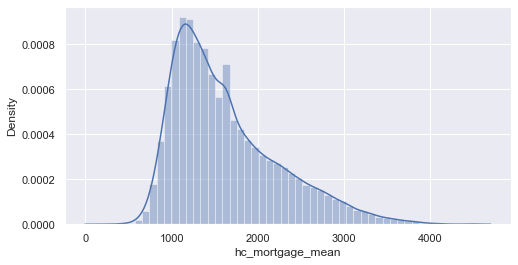

In [105]:
plt.figure(figsize = (8, 4))
sns.distplot(df_final['hc_mortgage_mean'], label='hc_mortgage_mean')
plt.show()

In [106]:
X = df_final.drop('hc_mortgage_mean', axis = 1)
y = df_final[['hc_mortgage_mean']]

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20370, 65)
(6791, 65)
(20370, 1)
(6791, 1)


In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
model = LinearRegression()

In [111]:
model.fit(X_train, y_train)

LinearRegression()

In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [113]:
y_preds = model.predict(X_test)

In [114]:
print('Mean Absolute Error',mean_absolute_error(y_test,y_preds))
print('Mean Squared Error',mean_squared_error(y_test,y_preds))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,y_preds)))
print('R2 score', r2_score(y_test, y_preds))

Mean Absolute Error 43.65071081984437
Mean Squared Error 4695.632626114047
Root Mean Squared Error 68.52468625330616
R2 score 0.9878917207419639


#### Combine the columns using PCA
Latent Variables  
Highschool graduation rates : 'hs_degree','hs_degree_male','hs_degree_female'  
Median_polulation_age: 'male_age_mean', 'male_age_median', 'male_age_stdev', 'female_age_mean', 'female_age_median', 'female_age_stdev'
Second mortgage statistics : 'home_equity_second_mortgage','second_mortgage', 'second_mortgage_cdf'
Bad_debt_expense : 'debt','debt_cdf','Bad_Debt'    
Percent Own : 'hi_mean','hi_median','hi_stdev','family_mean','family_median','family_stdev'

In [115]:
from sklearn.decomposition import PCA

In [116]:
pca = PCA(n_components = 1)

In [117]:
highschool_graduation_rates = pca.fit_transform(df_final[['hs_degree','hs_degree_male','hs_degree_female']])
df_final['highschool_graduation_rates'] = highschool_graduation_rates
df_final = df_final.drop(columns = ['hs_degree','hs_degree_male','hs_degree_female'])

In [118]:
median_population_age = pca.fit_transform(df_final[['male_age_mean', 'male_age_median', 'male_age_stdev', 'female_age_mean', 'female_age_median', 'female_age_stdev']])
df_final['median_population_age'] = median_population_age
df_final = df_final.drop(columns = ['male_age_mean', 'male_age_median', 'male_age_stdev', 'female_age_mean', 'female_age_median', 'female_age_stdev'])

In [119]:
second_mortgage_statistics = pca.fit_transform(df_final[['home_equity_second_mortgage','second_mortgage', 'second_mortgage_cdf']])
df_final['second_mortgage_statistics'] = second_mortgage_statistics
df_final = df_final.drop(columns = ['home_equity_second_mortgage','second_mortgage', 'second_mortgage_cdf'])

In [120]:
bad_debt_expense = pca.fit_transform(df_final[['debt','debt_cdf','bad_debt']])
df_final['bad_debt_expense'] = bad_debt_expense
df_final = df_final.drop(columns = ['debt','debt_cdf','bad_debt'])

In [121]:
percent_own = pca.fit_transform(df_final[['hi_mean','hi_median','hi_stdev','family_mean','family_median','family_stdev']])
df_final['percent_own'] = percent_own
df_final = df_final.drop(columns = ['hi_mean','hi_median','hi_stdev','family_mean','family_median','family_stdev'])

In [122]:
df_final.head()

ALand   AWater   pop  male_pop  female_pop  rent_mean  rent_median  \
0  202183361.0  1699120  5230      2612        2618  769.38638        784.0   
1    1560828.0   100363  2633      1349        1284  804.87924        848.0   
2   69561595.0   284193  6881      3643        3238  742.77365        703.0   
3    1105793.0        0  2700      1141        1559  803.42018        782.0   
4    2554403.0        0  5637      2586        3051  938.56493        881.0   

   rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  \
0   232.63967           272.34441         362.0     0.86761     0.79155   
1   253.46747           312.58622         513.0     0.97410     0.93227   
2   323.39011           291.85520         378.0     0.95238     0.88624   
3   297.39258           259.30316         368.0     0.94693     0.87151   
4   392.44096          1005.42886        1704.0     0.99286     0.98247   

   rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  \
0     0.59155     0.45634     0.42817     0.18592     0.15493     0.12958   
1     0.69920     0.69920     0.55179     0.41235     0.39044     0.27888   
2     0.79630     0.66667     0.39153     0.39153     0.28307     0.15873   
3     0.69832     0.61732     0.51397     0.46927     0.35754     0.32961   
4     0.91688     0.84740     0.78247     0.60974     0.55455     0.44416   

   universe_samples  used_samples  hi_sample_weight  hi_samples  \
0               387           355        1290.96240      2024.0   
1               542           502         838.74664      1127.0   
2               459           378        1155.20980      2488.0   
3               438           358         928.32193      1267.0   
4              1725          1540        1548.67477      1983.0   

   family_sample_weight  family_samples  hc_mortgage_mean  hc_mortgage_median  \
0             884.33516          1491.0        1414.80295              1223.0   
1             375.28798           554.0         864.41390               784.0   
2             709.74925          1889.0        1506.06758              1361.0   
3             490.18479           729.0        1175.28642              1101.0   
4             244.08903           395.0        1192.58759              1125.0   

   hc_mortgage_stdev  hc_mortgage_sample_weight  hc_mortgage_samples  \
0          641.22898                  377.83135                867.0   
1          482.27020                  316.88320                356.0   
2          731.89394                  699.41354               1491.0   
3          428.98751                  261.28471                437.0   
4          327.49674                   76.61052                134.0   

     hc_mean  hc_median   hc_stdev  hc_samples  hc_sample_weight  home_equity  \
0  570.01530      558.0  270.11299       770.0         499.29293      0.08919   
1  351.98293      336.0  125.40457       229.0         189.60606      0.04274   
2  556.45986      532.0  184.42175       538.0         323.35354      0.09512   
3  288.04047      247.0  185.55887       392.0         314.90566      0.01086   
4  443.68855      444.0   76.12674       124.0          79.55556      0.05426   

   home_equity_cdf  male_age_sample_weight  male_age_samples  \
0          0.49087               696.42136            2612.0   
1          0.70823               323.90204            1349.0   
2          0.46332               888.29730            3643.0   
3          0.82530               274.98956            1141.0   
4          0.65545              1296.89877            2586.0   

   female_age_sample_weight  female_age_samples  pct_own  married  \
0                 685.33845              2618.0  0.79046  0.57851   
1                 267.23367              1284.0  0.52483  0.34886   
2                 707.01963              3238.0  0.85331  0.64745   
3                 362.20193              1559.0  0.65037  0.47257   
4                1854.48652              3051.0  0.13046  0.12356   

   married

In [123]:
X1 = df_final.drop('hc_mortgage_mean', axis = 1)
y1 = df_final[['hc_mortgage_mean']]

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1,random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20370, 49)
(6791, 49)
(20370, 1)
(6791, 1)


In [125]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_preds = model1.predict(X_test)

In [126]:
print('Mean Absolute Error',mean_absolute_error(y_test,y_preds))
print('Mean Squared Error',mean_squared_error(y_test,y_preds))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,y_preds)))
print('R2 score', r2_score(y_test, y_preds))

Mean Absolute Error 43.71539608320615
Mean Squared Error 4791.458516592173
Root Mean Squared Error 69.22036200853165
R2 score 0.9876446216321215


In [127]:
test = pd.read_csv('test.csv')
test.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
0  255504      NaN       140       163       26      Michigan       MI   
1  252676      NaN       140         1       23         Maine       ME   
2  276314      NaN       140        15       42  Pennsylvania       PA   
3  248614      NaN       140       231       21      Kentucky       KY   
4  286865      NaN       140       355       48         Texas       TX   

             city                  place     type primary  zip_code  \
0         Detroit  Dearborn Heights City      CDP   tract     48239   
1          Auburn            Auburn City     City   tract      4210   
2       Pine City              Millerton  Borough   tract     14871   
3      Monticello        Monticello City     City   tract     42633   
4  Corpus Christi                  Edroy     Town   tract     78410   

   area_code        lat        lng      ALand   AWater   pop  male_pop  \
0        313  42.346422 -83.252823    2711280    39555  3417      1479   
1        207  44.100724 -70.257832   14778785  2705204  3796      1846   
2        607  41.948556 -76.783808  258903666   863840  3944      2065   
3        606  36.746009 -84.766870  501694825  2623067  2508      1427   
4        361  27.882462 -97.678586   13796057   497689  6230      3274   

   female_pop   rent_mean  rent_median  rent_stdev  rent_sample_weight  \
0        1938   858.57169        859.0   232.39082           276.07497   
1        1950   832.68625        750.0   267.22342           183.32299   
2        1879   816.00639        755.0   416.25699           141.39063   
3        1081   418.68937        385.0   156.92024            88.95960   
4        2956  1031.63763        997.0   326.76727           277.39844   

   rent_samples  rent_gt_10  rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  \
0         424.0     1.00000     0.95696     0.85316     0.85316     0.85316   
1         245.0     1.00000     1.00000     0.86611     0.67364     0.30962   
2         217.0     0.97573     0.93204     0.78641     0.71845     0.63592   
3          93.0     1.00000     0.93548     0.93548     0.64516     0.55914   
4         624.0     0.72276     0.66506     0.53526     0.38301     0.18910   

   rent_gt_35  rent_gt_40  rent_gt_50  universe_samples  used_samples  \
0     0.85316     0.76962     0.63544               435           395   
1     0.30962     0.30962     0.27197               275           239   
2     0.47573     0.43689     0.32524               245           206   
3     0.46237     0.46237     0.36559               153            93   
4     0.16667     0.14263     0.11058               660           624   

        hi_mean  hi_median     hi_stdev  hi_sample_weight  hi_samples  \
0   48899.52121    38746.0  44392.20902         798.02401      1180.0   
1   72335.33234    61008.0  51895.81159         922.82969      1722.0   
2   58501.15901    51648.0  45245.27248         893.07759      1461.0   
3   38237.55059    31612.0  34527.61607         775.17947       957.0   
4  114456.07790    94211.0  81950.95692         836.30759      2404.0   

    family_mean  family_median  family_stdev  family_sample_weight  \
0   53802.87122        45167.0   43756.56479             464.30972   
1   85642.22095        74759.0   49156.72870             482.99945   
2   65694.06582        57186.0   44239.31893             619.73962   
3   44156.38709        34687.0   34899.74300             535.21987   
4  123527.02420       103898.0   72173.55823             507.42257   

   family_samples  hc_mortgage_mean  hc_mortgage_median  hc_mortgage_stdev  \
0           769.0        1139.24548              1109.0          336.47710   
1          1147.0        1533.25988              1438.0          536.61118   
2          1084.0        1254.54462              1089.0          596.85204   
3           689.0         862.65763               749.0          624.42157   
4          1738.0        1996.41425              1907.0          740.21168   

 

In [128]:
test.shape

(11709, 80)

In [129]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

In [130]:
test.columns.tolist()

['UID',
 'BLOCKID',
 'SUMLEVEL',
 'COUNTYID',
 'STATEID',
 'state',
 'state_ab',
 'city',
 'place',
 'type',
 'primary',
 'zip_code',
 'area_code',
 'lat',
 'lng',
 'ALand',
 'AWater',
 'pop',
 'male_pop',
 'female_pop',
 'rent_mean',
 'rent_median',
 'rent_stdev',
 'rent_sample_weight',
 'rent_samples',
 'rent_gt_10',
 'rent_gt_15',
 'rent_gt_20',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'universe_samples',
 'used_samples',
 'hi_mean',
 'hi_median',
 'hi_stdev',
 'hi_sample_weight',
 'hi_samples',
 'family_mean',
 'family_median',
 'family_stdev',
 'family_sample_weight',
 'family_samples',
 'hc_mortgage_mean',
 'hc_mortgage_median',
 'hc_mortgage_stdev',
 'hc_mortgage_sample_weight',
 'hc_mortgage_samples',
 'hc_mean',
 'hc_median',
 'hc_stdev',
 'hc_samples',
 'hc_sample_weight',
 'home_equity_second_mortgage',
 'second_mortgage',
 'home_equity',
 'debt',
 'second_mortgage_cdf',
 'home_equity_cdf',
 'debt_cdf',
 'hs_degree',
 'hs_degree_male',
 'hs

In [131]:
test = test.drop(columns = ['BLOCKID', 'SUMLEVEL', 'primary'])

In [132]:
test = test.drop(columns = ['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type', 'zip_code', 'area_code', 'lat', 'lng'])

In [133]:
test = test.dropna()

In [134]:
test['bad_debt'] = test['second_mortgage'] + test['home_equity'] - test['home_equity_second_mortgage']

In [135]:
test_X = test.drop('hc_mortgage_mean', axis = 1)
test_y = test[['hc_mortgage_mean']]

In [136]:
x_sample = test_X.sample(100)

In [137]:
x_sample.index

Int64Index([ 8003,  3589,  2966,   519,  5992,  7731,  3513,  8834,  9825,
             4830,  8924, 11337,  5923,  8874,   487,   755, 10865,  2189,
              558,   106, 11493, 10952,  4100,   110, 10027,  1825,  2677,
             1123,   197,  7432,  5194, 11051,  3871,  2041,  4542,  9605,
              915,  2332,  2770,  6877,  2037,  3604,  7488,  4640,  8268,
              895,  6936,  1706,  2862,   789,  9655,  4749,  5732,  9043,
             6397,   748,  2170, 11397,  8673,  1645,  4183, 11278,  3905,
             3684,  4699,  6007,  2272, 10110,  5257,  9408,  7435,  7344,
             5398,  8977, 11357,  8363, 10928,  4003, 10697,  1992,  8174,
             6540,  2158,  8390,  5128,  9072,  8203,  4465, 11318,  6830,
             5578,  1284,  9170,   640,  2915,  9616,  4865, 10502,  1056,
             8730],
           dtype='int64')

In [153]:
y_sample = test_y.loc[x_sample.index]

In [154]:
pred_y = model.predict(x_sample)

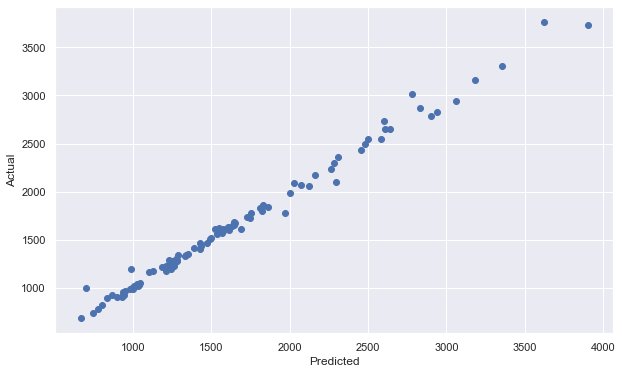

In [155]:
plt.figure(figsize = (10,6))
plt.scatter(y_sample['hc_mortgage_mean'], pred_y)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [156]:
print('Mean Absolute Error',mean_absolute_error(y_sample, pred_y))
print('Mean Squared Error',mean_squared_error(y_sample, pred_y))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_sample, pred_y)))
print('R2 score', r2_score(y_sample, pred_y))

Mean Absolute Error 40.92342395289134
Mean Squared Error 4584.278230860323
Root Mean Squared Error 67.70729820972274
R2 score 0.9903209636581461


In [157]:
y_sample['Predicted'] = pred_y
y_sample

hc_mortgage_mean    Predicted
8003          799.98510   814.716107
3589         1127.37643  1169.338434
2966         1039.80484  1021.251901
519          1286.68473  1336.855663
5992         1546.85229  1604.904752
7731         1831.59507  1855.834488
3513         2001.25983  1980.878029
8834         2071.81919  2067.054213
9825         1101.60523  1163.204907
4830         1282.00401  1283.853196
8924         1641.88869  1648.322978
11337        1335.70257  1337.988843
5923         2456.83503  2427.717153
8874          898.62349   896.858737
487           990.85113   998.124736
755          2483.03691  2491.837461
10865        2027.00697  2091.906870
2189         1431.74511  1436.191382
558          1267.20472  1265.757437
106          1200.83771  1213.803602
11493        1605.75058  1628.744925
10952        1632.89141  1638.471022
4100         1810.72240  1824.999079
110          1688.66997  1612.573729
10027        1245.94660  1271.723560
1825         3059.21765  2939.136941
2677         1751.85330  1777.384036
1123         1333.02668  1328.351085
197          2829.76317  2870.546140
7432         1032.46847  1017.659868
5194         1182.74789  1210.759918
11051        2900.21786  2782.391807
3871         1525.17610  1605.592700
2041         1352.74123  1352.394188
4542         2942.11672  2830.913837
9605         1387.79683  1406.597581
915           745.02124   736.701519
2332         2293.18072  2096.072530
2770          664.22213   677.770899
6877         2122.93967  2052.566089
2037         1008.14227  1015.154350
3604          773.33106   777.008914
7488         2280.95283  2302.154599
4640         1224.09051  1203.959382
8268         1046.06037  1047.120442
895           926.34482   901.977728
6936         1000.14398   987.329395
1706         2261.33742  2230.321373
2862         1729.07754  1734.471773
789          1579.94767  1600.919913
9655         1212.12499  1192.816857
4749         1825.34989  1800.831582
5732         2306.83980  2359.800075
9043          950.26489   961.858400
6397         1537.60569  1560.354042
748           830.35752   889.371158
2170         1031.67688  1023.992740
11397        3902.30616  3731.319205
8673         1270.84453  1293.848050
1645         1489.59047  1506.038830
4183         1499.39496  1511.443570
11278        1228.11954  1247.379683
3905         3625.63486  3765.807799
3684         1282.37464  1279.348956
4699         2160.02618  2168.241404
6007         1748.60106  1727.345323
2272         3351.68141  3302.342424
10110        1240.85987  1188.601672
5257         1646.54172  1680.976000
9408          979.43207   985.846971
7435          940.10885   925.120549
7344         1231.46193  1282.764229
5398          935.06307   921.024763
8977         2605.30640  2653.906334
11357        1425.91907  1465.850597
8363         1423.86297  1405.704970
10928        2497.75602  2546.138345
4003          987.73380  1193.370038
10697         862.20136   926.468418
1992         2778.72342  3012.103610
8174         1259.20127  1219.619823
6540         1648.27059  1676.267361
2158         1262.98267  1251.130363
8390         1549.30952  1618.005801
5128         1858.35748  1840.348437
9072          934.22013   952.539112
8203         1210.99874  1227.660958
4465         2636.38919  2653.026128
11318         696.62929   997.196557
6830         1470.05645  1461.902630
5578         1613.65349  1601.081387
1284         1569.65275  1572.727375
9170         1969.54719  1771.449013
640          1829.82044  1844.910325
2915         1022.73535  1034.120382
9616         1573.01030  1607.804012
4865         3182.77212  3162.296277
10502        1212.34337  1176.436986
1056         2602.27123  2730.761169
8730         2580.76911  2548.107828

##### Data Reporting:

  2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

    a) Box plot of distribution of average rent by type of place (village, urban, town, etc.).

    b) Pie charts to show overall debt and bad debt.

    c) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map.

    d) Heat map for correlation matrix.

    e) Pie chart to show the population distribution across different types of places (village, urban, town etc.)

### Here is my tableau report link.  

https://public.tableau.com/app/profile/baomei.wen/viz/RealEstateProject_16337114140850/RealEstateProject